### COMPARATIVE STUDY OF DIFFERENT MACHINE LEARNING MODELS TO PREDICT DIABETES

Diabetes is a chronic disease which kills millions of people each year. It is very important to diagnose this disease early as a delay in diagnosis could lead to various health issues like amputation, blindess, cardio vascular diseases and so on. In this project we will implement various machine learning techniques on a diabetes dataset to predict who are at risk of diabetes.

In [13]:
# suppress unwanted warnings

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Let's import the libraries we will need for our project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### DATA UNDERSTANDING 

In [15]:
# Lets load the dataset we will need to use in our project.

df_diabetes = pd.read_csv("F:\Masters project\diabetes_binary_health_indicators_BRFSS2015.csv")

In [16]:
# checking the dataset

df_diabetes.head()

# It appears all the values in our dataset are in numerical form

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
df_diabetes.info()

# Yes, all the values are of float type means they are in numeric form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [18]:
df_diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [19]:
# Our dataset has 253680 records and has 22 columns in total

df_diabetes.shape

(253680, 22)

In [20]:
# Our dataset has no null values means all the data is valid

df_diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [21]:
value1 = int(df_diabetes.loc[df_diabetes['Diabetes_binary'] == 1, 'Diabetes_binary'].count())
value2 = int(df_diabetes.loc[df_diabetes['Diabetes_binary'] == 0, 'Diabetes_binary'].count())

print("Total diabetic patients are:", value1)
print("Total non diabetic patients are:", value2)

Total diabetic patients are: 35346
Total non diabetic patients are: 218334


In [22]:
value = [value1, value2]
label = ["Diabetic", "Non-Diabetic"]

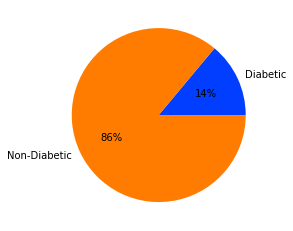

In [23]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(value, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

In [24]:
# Removing duplicate rows from the dataset
df_diabetes.drop_duplicates(inplace = True)

Diabetes_binary is the dependent variable which explains whether the person has diabetes or not. Here, 0 means the person does not have diabetes and 1 means the peson has diabetes

Let's explore the number of records we have for diabetes and non-diabetes patient.

In [25]:
value1 = int(df_diabetes.loc[df_diabetes['Diabetes_binary'] == 1, 'Diabetes_binary'].count())
value2 = int(df_diabetes.loc[df_diabetes['Diabetes_binary'] == 0, 'Diabetes_binary'].count())

print("Total diabetic patients are:", value1)
print("Total non diabetic patients are:", value2)

Total diabetic patients are: 35097
Total non diabetic patients are: 194377


In [26]:
value = [value1, value2]
label = ["Diabetic", "Non-Diabetic"]

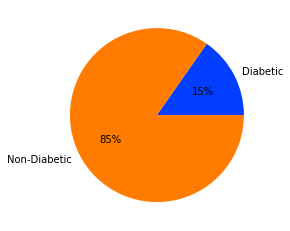

In [27]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(value, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Our dataset is unbalanced which means we would have to balance our dataset before implementing the model.

#### DATA CLEANING

All our values are of float type. Some of them are in binary form which means they have value in only 0 and 1 form. And, some are in numeric form but there values corresponds to a categorical form data. Lets understand them one by one.

Diabetes_binary: This variable is our dependent variable. It has only two values which are 0 meaning non-diabetic and 1 meaning diabetic. Since, it is in float form. Lets convert it to numeric form.

In [28]:
df_diabetes['Diabetes_binary'] = df_diabetes['Diabetes_binary'].astype(int)
df_diabetes['Diabetes_binary'].head()

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int32

HighBP: It contains binary value. 0 means “No High BP” and 1 means “High BP”. Lets convert it to numeric form.

In [29]:
df_diabetes['HighBP'] = df_diabetes['HighBP'].astype(int)
df_diabetes['HighBP'].head()

0    1
1    0
2    1
3    1
4    1
Name: HighBP, dtype: int32

HighChol: It contains binary value. 0 means “No High Cholesterol” and 1 means “High Cholesterol”. Lets convert it to numeric form.

In [30]:
df_diabetes['HighChol'] = df_diabetes['HighChol'].astype(int)
df_diabetes['HighChol'].head()

0    1
1    0
2    1
3    0
4    1
Name: HighChol, dtype: int32

CholCheck: It contains binary value. 0 means “No Cholesterol check in past 5 years” and 1 means “Cholesterol was checked in past 5 years”.

In [31]:
df_diabetes['CholCheck'] = df_diabetes['CholCheck'].astype(int)
df_diabetes['CholCheck'].head()

0    1
1    0
2    1
3    1
4    1
Name: CholCheck, dtype: int32

Smoker: It’s a binary value which contains information if the person has smoked 100 cigarettes in his entire life. [Note: 5 packs = 100 cigarettes]. Here 0 means “No” and 1 means “Yes”.

In [32]:
df_diabetes['Smoker'] = df_diabetes['Smoker'].astype(int)
df_diabetes['Smoker'].head()

0    1
1    1
2    0
3    0
4    0
Name: Smoker, dtype: int32

Stroke: It contains a binary value which explains if the person ever had a stroke. Here, 0 means “No” and 1 means “Yes”.

In [33]:
df_diabetes['Stroke'] = df_diabetes['Stroke'].astype(int)
df_diabetes['Stroke'].head()

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int32

HeartDiseaseorAttack: It contains a binary value which explains if the person ever had coronary heart disease (CHD) or myocardial infarction (MI). Here, 0 means “No” and 1 means “Yes”.

In [34]:
df_diabetes['HeartDiseaseorAttack'] = df_diabetes['HeartDiseaseorAttack'].astype(int)
df_diabetes['HeartDiseaseorAttack'].head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDiseaseorAttack, dtype: int32

PhysActivity: It contains a binary value which explains if the person did any physical activity in the past 30 days. This does not include their job. Here, 0 means “No” and 1 means “Yes”.

In [35]:
df_diabetes['PhysActivity'] = df_diabetes['PhysActivity'].astype(int)
df_diabetes['PhysActivity'].head()

0    0
1    1
2    0
3    1
4    1
Name: PhysActivity, dtype: int32

Fruits: It contains a binary value which explains if the person consumes fruit one or more times per day. Here, 0 means “No” and 1 means “Yes”.

In [36]:
df_diabetes['Fruits'] = df_diabetes['Fruits'].astype(int)
df_diabetes['Fruits'].head()

0    0
1    0
2    1
3    1
4    1
Name: Fruits, dtype: int32

Veggies: It contains a binary value which explains if the person consumes vegetables one or more times per day. Here, 0 means “No” and 1 means “Yes”.

In [37]:
df_diabetes['Veggies'] = df_diabetes['Veggies'].astype(int)
df_diabetes['Veggies'].head()

0    1
1    0
2    0
3    1
4    1
Name: Veggies, dtype: int32

HvyAlcoholConsump: It contains a binary value which explains if the person consumes alcohol. Here, 0 means “No” and 1 means “Yes”. Here, for men “yes” means 14 or more drinks per week and for women it means 7 or more drinks per week.

In [38]:
df_diabetes['HvyAlcoholConsump'] = df_diabetes['HvyAlcoholConsump'].astype(int)
df_diabetes['HvyAlcoholConsump'].head()

0    0
1    0
2    0
3    0
4    0
Name: HvyAlcoholConsump, dtype: int32

AnyHealthcare: It contains a binary value which explains if the person has any form of health care coverage. Here, 0 means “No health coverage” and 1 means “Yes, they have health coverage”.

In [39]:
df_diabetes['AnyHealthcare'] = df_diabetes['AnyHealthcare'].astype(int)
df_diabetes['AnyHealthcare'].head()

0    1
1    0
2    1
3    1
4    1
Name: AnyHealthcare, dtype: int32

NoDocbcCost: It contains a binary value which explains if the person in the past had to see a doctor but couldn’t because of the cost. Here, 0 means “No” and 1 means “Yes”.

In [40]:
df_diabetes['NoDocbcCost'] = df_diabetes['NoDocbcCost'].astype(int)
df_diabetes['NoDocbcCost'].head()

0    0
1    1
2    1
3    0
4    0
Name: NoDocbcCost, dtype: int32

DiffWalk: It contains a binary value which explains if the person has serious difficulty walking or climbing stairs. Here, 0 means “No” and 1 means “Yes”.

In [41]:
df_diabetes['DiffWalk'] = df_diabetes['DiffWalk'].astype(int)
df_diabetes['DiffWalk'].head()

0    1
1    0
2    1
3    0
4    0
Name: DiffWalk, dtype: int32

Sex: It contains a binary value. Here, 0 means “Female” and 1 means “Male”.

In [42]:
df_diabetes['Sex'] = df_diabetes['Sex'].astype(int)
df_diabetes['Sex'].head()

0    0
1    0
2    0
3    0
4    0
Name: Sex, dtype: int32

GenHlth: It contains a numeric value on a scale 1-5 which explain the general health of the person. Here, 1 means “Excellent”, 2  means “very good”, 3 means “good”, 4 means “fair” and 5 means “poor”.

In [43]:
df_diabetes['GenHlth'] = df_diabetes['GenHlth'].astype(int).astype(str)
df_diabetes['GenHlth'].head()

0    5
1    3
2    5
3    2
4    2
Name: GenHlth, dtype: object

Age: It contains a numeric value from 1 to 13 where each number represent a separate age bin. Here, 1 means "Age 18 to 24", 2 means "Age 25 to 29", 3 means "Age 30 to 34", 4 means "Age 35 to 39", 5 means "Age 40 to 44", 6 means "Age 45 to 49", 7 means "Age 50 to 54", 8 means "Age 55 to 59", 9 means "Age 60 to 64", 10 means "Age 65 to 69", 11 means "Age 70 to 74", 12 means "Age 75 to 79" and 13 means "Age 80 or older”.

In [44]:
df_diabetes['Age'] = df_diabetes['Age'].astype(int).astype(str)
df_diabetes['Age'].head()

0     9
1     7
2     9
3    11
4    11
Name: Age, dtype: object

Education: It contains a numeric value from range 1 to 6. Here, 1 means "Never attended school or only kindergarten", 2 means 
"Grades 1 through 8 (Elementary)", 3 means "Grades 9 through 11 (Some high school)", 4 means "Grade 12 or GED (High school graduate)", 5 means "College 1 year to 3 years (Some college or technical school)", 6 means "College 4 years or more (College graduate)"

In [45]:
df_diabetes['Education'] = df_diabetes['Education'].astype(int).astype(str)
df_diabetes['Education'].head()

0    4
1    6
2    4
3    3
4    5
Name: Education, dtype: object

Income: It contains a numeric value from range 1 to 8. Here, 1 means "Less than 10K", 2 means "Less than 15K", 3 means "Less than 20K", 4 means "Less than 25K", 5 means "Less than 35K", 6 means "Less than 50K", 7 means "Less than 75K", 8 means "75K or more".

In [46]:
df_diabetes['Income'] = df_diabetes['Income'].astype(int).astype(str)
df_diabetes['Income'].head()

0    3
1    1
2    8
3    6
4    4
Name: Income, dtype: object

BMI: Body Mass Index. It’s a numerical value. For our research we will convert BMI into categorical form.

MentHlth: It contains a numeric value from 0 to 30. The value here means the number of days the person was in poor mental health.

In [47]:
df_diabetes['MentHlth'] = df_diabetes['MentHlth'].astype(int)
df_diabetes['MentHlth'].head()

0    18
1     0
2    30
3     0
4     3
Name: MentHlth, dtype: int32

PhysHlth: It contains a numeric value from 0 to 30. The value here means the number of days the person was in poor physical health or had injuries.

In [48]:
df_diabetes['PhysHlth'] = df_diabetes['PhysHlth'].astype(int)
df_diabetes['PhysHlth'].head()

0    15
1     0
2    30
3     0
4     0
Name: PhysHlth, dtype: int32

In [49]:
df_diabetes.loc[df_diabetes['BMI'] < 18.5, 'BMI_status'] = "Underweight"
df_diabetes.loc[((df_diabetes['BMI'] >= 18.5) & (df_diabetes['BMI'] < 24.9)), 'BMI_status'] = "Normal"
df_diabetes.loc[((df_diabetes['BMI'] >= 25.0) & (df_diabetes['BMI'] < 29.9)), 'BMI_status'] = "Overweight"
df_diabetes.loc[(df_diabetes['BMI'] >= 30), 'BMI_status'] = "Obese"

##### Univariate Analysis

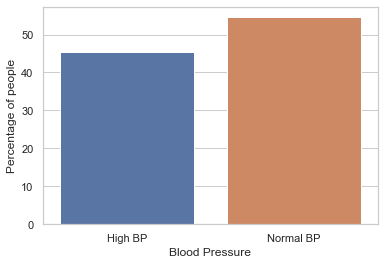

In [71]:
# barplot to understand the relationship


sns.set_theme(style="whitegrid")
label = ["High BP", "Normal BP"]

value1_yes = (df_diabetes[df_diabetes['HighBP'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['HighBP'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]


plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

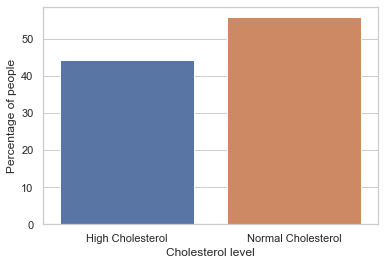

In [72]:
sns.set_theme(style="whitegrid")
label = ["High Cholesterol", "Normal Cholesterol"]

value1_yes = (df_diabetes[df_diabetes['HighChol'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['HighChol'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Cholesterol level')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

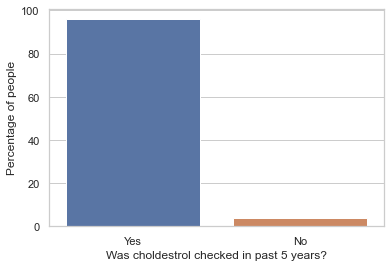

In [73]:

sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['CholCheck'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['CholCheck'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Was choldestrol checked in past 5 years?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

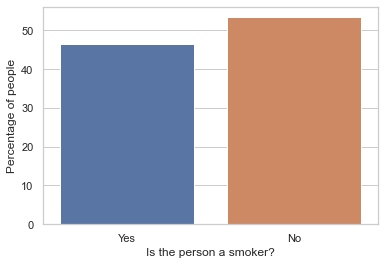

In [74]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['Smoker'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Smoker'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Is the person a smoker?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

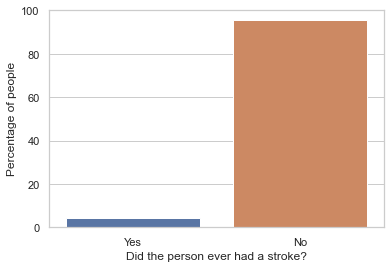

In [75]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['Stroke'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Stroke'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Did the person ever had a stroke?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

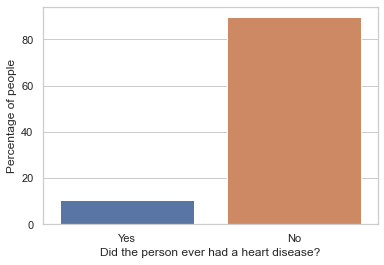

In [76]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Did the person ever had a heart disease?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

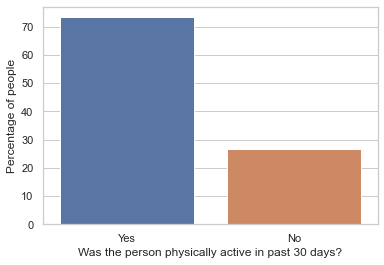

In [77]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['PhysActivity'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['PhysActivity'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Was the person physically active in past 30 days?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

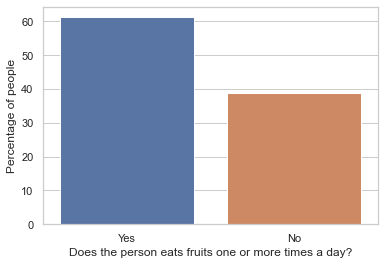

In [78]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['Fruits'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Fruits'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Does the person eats fruits one or more times a day?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

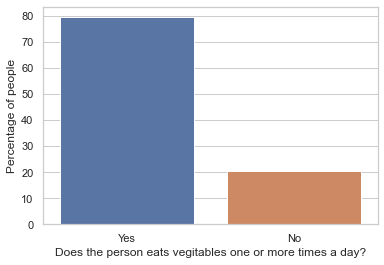

In [79]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['Veggies'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Veggies'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Does the person eats vegitables one or more times a day?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

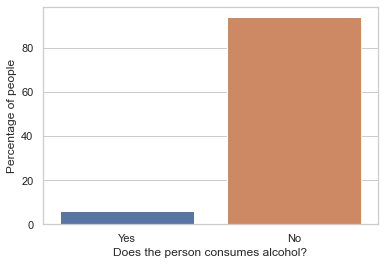

In [80]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['HvyAlcoholConsump'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['HvyAlcoholConsump'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Does the person consumes alcohol?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

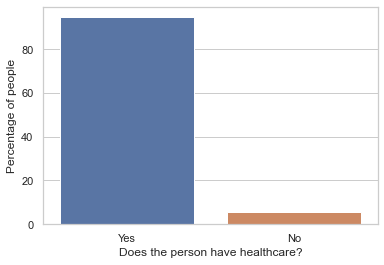

In [81]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['AnyHealthcare'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['AnyHealthcare'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Does the person have healthcare?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

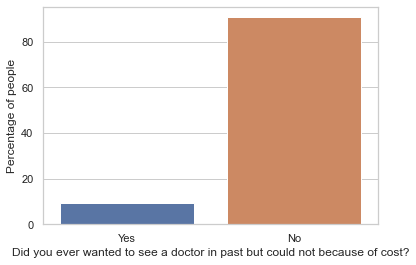

In [82]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['NoDocbcCost'] == 1].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['NoDocbcCost'] == 0].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes]

plt.xlabel('Did you ever wanted to see a doctor in past but could not because of cost?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

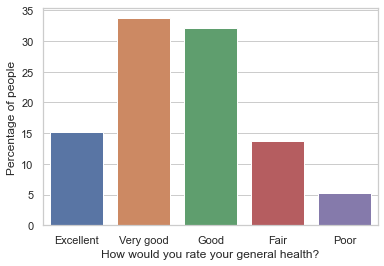

In [88]:
sns.set_theme(style="whitegrid")
label = ["Excellent", "Very good", "Good", "Fair", "Poor"]

value1_yes = (df_diabetes[df_diabetes['GenHlth'] == "1"].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['GenHlth'] == "2"].shape[0]/df_diabetes.shape[0])*100
value3_yes = (df_diabetes[df_diabetes['GenHlth'] == "3"].shape[0]/df_diabetes.shape[0])*100
value4_yes = (df_diabetes[df_diabetes['GenHlth'] == "4"].shape[0]/df_diabetes.shape[0])*100
value5_yes = (df_diabetes[df_diabetes['GenHlth'] == "5"].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes, value2_yes, value3_yes, value4_yes, value5_yes]

plt.xlabel('How would you rate your general health?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

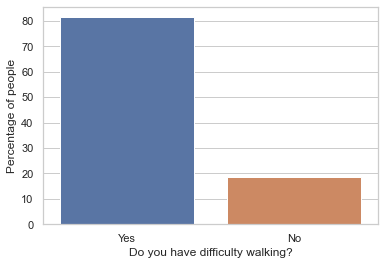

In [90]:
sns.set_theme(style="whitegrid")
label = ["Yes", "No"]

value1_yes = (df_diabetes[df_diabetes['DiffWalk'] == 0].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['DiffWalk'] == 1].shape[0]/df_diabetes.shape[0])*100


value1 = [value1_yes, value2_yes]

plt.xlabel('Do you have difficulty walking?')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

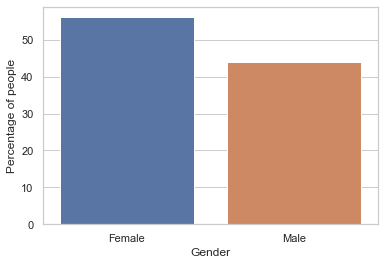

In [91]:
sns.set_theme(style="whitegrid")
label = ["Female", "Male"]

value1_yes = (df_diabetes[df_diabetes['Sex'] == 0].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Sex'] == 1].shape[0]/df_diabetes.shape[0])*100


value1 = [value1_yes, value2_yes]

plt.xlabel('Gender')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()

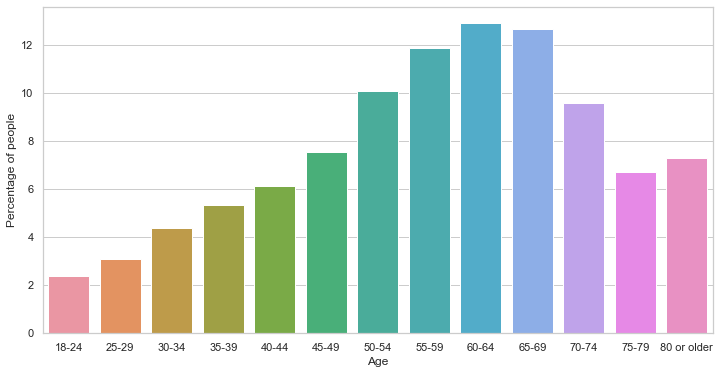

In [98]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
label = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]

value1_yes = (df_diabetes[df_diabetes['Age'] == "1"].shape[0]/df_diabetes.shape[0])*100
value2_yes = (df_diabetes[df_diabetes['Age'] == "2"].shape[0]/df_diabetes.shape[0])*100
value3_yes = (df_diabetes[df_diabetes['Age'] == "3"].shape[0]/df_diabetes.shape[0])*100
value4_yes = (df_diabetes[df_diabetes['Age'] == "4"].shape[0]/df_diabetes.shape[0])*100
value5_yes = (df_diabetes[df_diabetes['Age'] == "5"].shape[0]/df_diabetes.shape[0])*100
value6_yes = (df_diabetes[df_diabetes['Age'] == "6"].shape[0]/df_diabetes.shape[0])*100
value7_yes = (df_diabetes[df_diabetes['Age'] == "7"].shape[0]/df_diabetes.shape[0])*100
value8_yes = (df_diabetes[df_diabetes['Age'] == "8"].shape[0]/df_diabetes.shape[0])*100
value9_yes = (df_diabetes[df_diabetes['Age'] == "9"].shape[0]/df_diabetes.shape[0])*100
value10_yes = (df_diabetes[df_diabetes['Age'] == "10"].shape[0]/df_diabetes.shape[0])*100
value11_yes = (df_diabetes[df_diabetes['Age'] == "11"].shape[0]/df_diabetes.shape[0])*100
value12_yes = (df_diabetes[df_diabetes['Age'] == "12"].shape[0]/df_diabetes.shape[0])*100
value13_yes = (df_diabetes[df_diabetes['Age'] == "13"].shape[0]/df_diabetes.shape[0])*100

value1 = [value1_yes,value2_yes,value3_yes,value4_yes,value5_yes,value6_yes,value7_yes,value8_yes,value9_yes,value10_yes,value11_yes,value12_yes,value13_yes]

plt.xlabel('Age')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.show()


0          9
1          7
2          9
3         11
4         11
          ..
253675     5
253676    11
253677     2
253678     7
253679     9
Name: Age, Length: 229474, dtype: object

#### EXPLORATORY DATA ANALYSIS

Let's try and undestand the relationship of independent variables with Diabetes_binary.

In [50]:
# Created two separate databases. One for diabetic and other for non-diabetic patients.

diabetes_yes = df_diabetes[df_diabetes['Diabetes_binary'] == 1]
diabetes_no = df_diabetes[df_diabetes['Diabetes_binary'] == 0]

###### Relationship with variable HighBP

In [51]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['HighBP'] == 1].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['HighBP'] == 0].shape[0]/diabetes_yes.shape[0])*100

value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['HighBP'] == 1].shape[0]/df_diabetes[df_diabetes['HighBP'] == 1].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['HighBP'] == 0].shape[0]/df_diabetes[df_diabetes['HighBP'] == 0].shape[0])*100

value3 = [value3_yes, value4_yes]


In [52]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['HighBP'] == 1].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['HighBP'] == 0].shape[0]/diabetes_no.shape[0])*100

value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['HighBP'] == 1].shape[0]/df_diabetes[df_diabetes['HighBP'] == 1].shape[0])*100
value4_no = (diabetes_no[diabetes_no['HighBP'] == 0].shape[0]/df_diabetes[df_diabetes['HighBP'] == 0].shape[0])*100

value4 = [value3_no, value4_no]

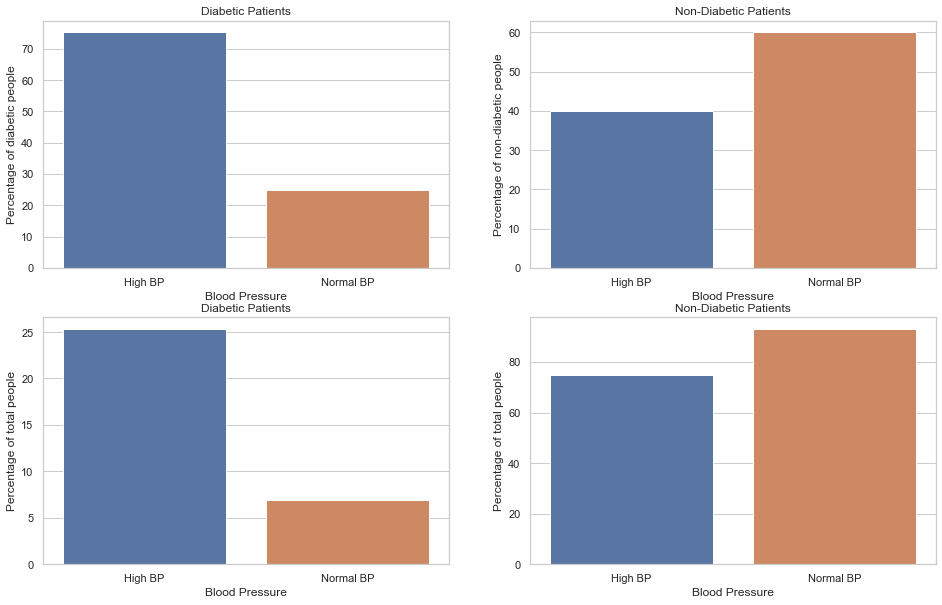

In [53]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))

sns.set_theme(style="whitegrid")
label = ["High BP", "Normal BP"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

We can see that people who have diabetes are more likely to have high blood pressure as well.

###### Relationship with variable HighChol

In [39]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['HighChol'] == 1].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['HighChol'] == 0].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['HighChol'] == 1].shape[0]/df_diabetes[df_diabetes['HighChol'] == 1].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['HighChol'] == 0].shape[0]/df_diabetes[df_diabetes['HighChol'] == 0].shape[0])*100
value3 = [value3_yes, value4_yes]


In [40]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['HighChol'] == 1].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['HighChol'] == 0].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['HighChol'] == 1].shape[0]/df_diabetes[df_diabetes['HighChol'] == 1].shape[0])*100
value4_no = (diabetes_no[diabetes_no['HighChol'] == 0].shape[0]/df_diabetes[df_diabetes['HighChol'] == 0].shape[0])*100
value4 = [value3_no, value4_no]


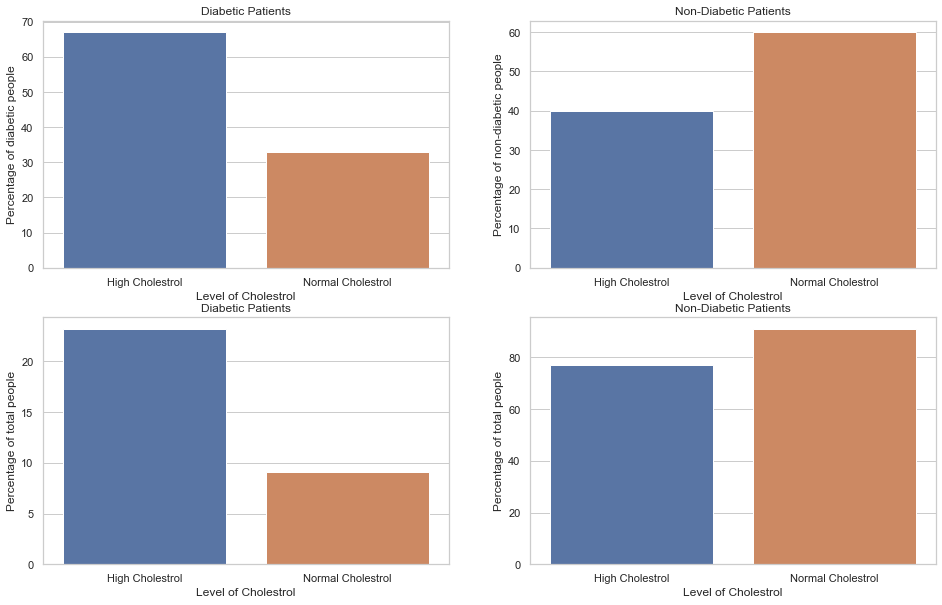

In [41]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))

sns.set_theme(style="whitegrid")
label = ["High Cholestrol", "Normal Cholestrol"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Level of Cholestrol')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Level of Cholestrol')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Level of Cholestrol')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Level of Cholestrol')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

We can see that people who have diabetes are more likely to have high blood pressure as well.

###### Relationship with variable CholCheck

In [42]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['CholCheck'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['CholCheck'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['CholCheck'] == 0].shape[0]/df_diabetes[df_diabetes['CholCheck'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['CholCheck'] == 1].shape[0]/df_diabetes[df_diabetes['CholCheck'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [43]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['CholCheck'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['CholCheck'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['CholCheck'] == 0].shape[0]/df_diabetes[df_diabetes['CholCheck'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['CholCheck'] == 1].shape[0]/df_diabetes[df_diabetes['CholCheck'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

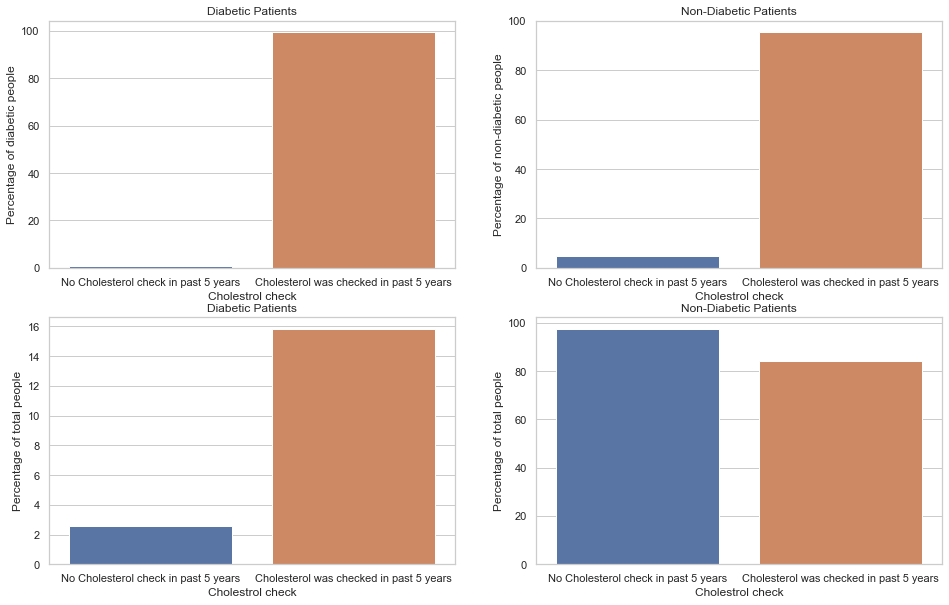

In [44]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No Cholesterol check in past 5 years", "Cholesterol was checked in past 5 years"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Cholestrol check')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Cholestrol check')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Cholestrol check')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Cholestrol check')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)


plt.show()

Results of cholestrol check are not very conclusive for our model

######  Relationship with variable Smoker

In [45]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['Smoker'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['Smoker'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['Smoker'] == 0].shape[0]/df_diabetes[df_diabetes['Smoker'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['Smoker'] == 1].shape[0]/df_diabetes[df_diabetes['Smoker'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [46]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['Smoker'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['Smoker'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['Smoker'] == 0].shape[0]/df_diabetes[df_diabetes['Smoker'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['Smoker'] == 1].shape[0]/df_diabetes[df_diabetes['Smoker'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

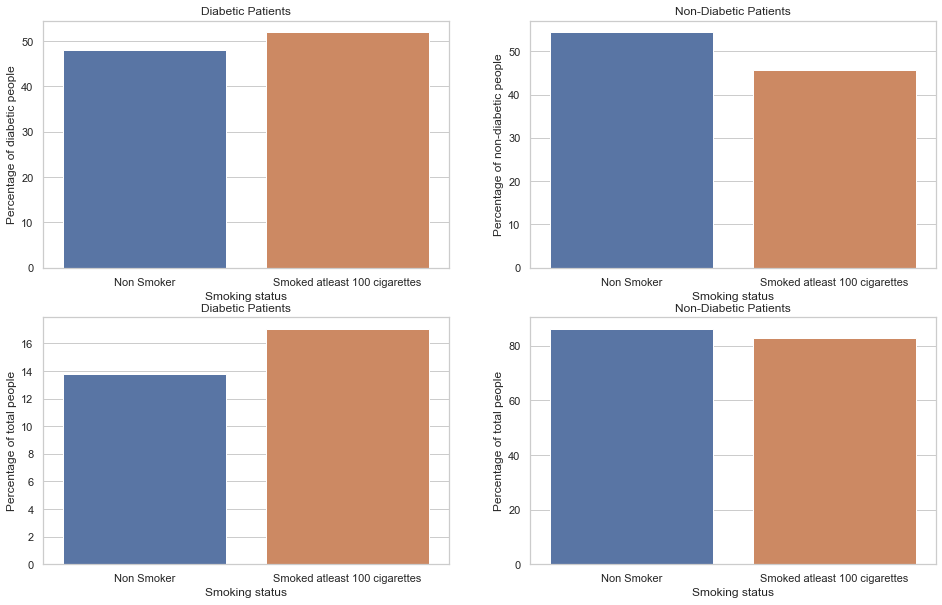

In [47]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))

sns.set_theme(style="whitegrid")
label = ["Non Smoker", "Smoked atleast 100 cigarettes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Smoking status')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Smoking status')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Smoking status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Smoking status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Results of smoking are not very conclusive for our model

######  Relationship with variable Stroke

In [48]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['Stroke'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['Stroke'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['Stroke'] == 0].shape[0]/df_diabetes[df_diabetes['Stroke'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['Stroke'] == 1].shape[0]/df_diabetes[df_diabetes['Stroke'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [49]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['Stroke'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['Stroke'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['Stroke'] == 0].shape[0]/df_diabetes[df_diabetes['Stroke'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['Stroke'] == 1].shape[0]/df_diabetes[df_diabetes['Stroke'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

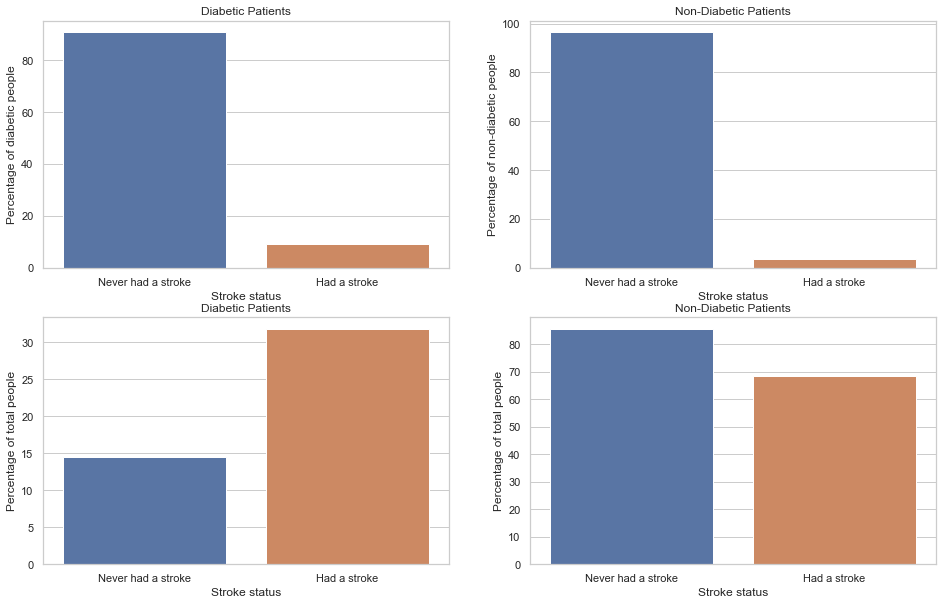

In [50]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))

sns.set_theme(style="whitegrid")
label = ["Never had a stroke", "Had a stroke"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Stroke status')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Stroke status')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Stroke status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Stroke status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Some relation is there among people who had a stroke and diabetes.

######  Relationship with variable HeartDiseaseorAttack

In [51]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['HeartDiseaseorAttack'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['HeartDiseaseorAttack'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['HeartDiseaseorAttack'] == 0].shape[0]/df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['HeartDiseaseorAttack'] == 1].shape[0]/df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [52]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['HeartDiseaseorAttack'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['HeartDiseaseorAttack'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['HeartDiseaseorAttack'] == 0].shape[0]/df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['HeartDiseaseorAttack'] == 1].shape[0]/df_diabetes[df_diabetes['HeartDiseaseorAttack'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

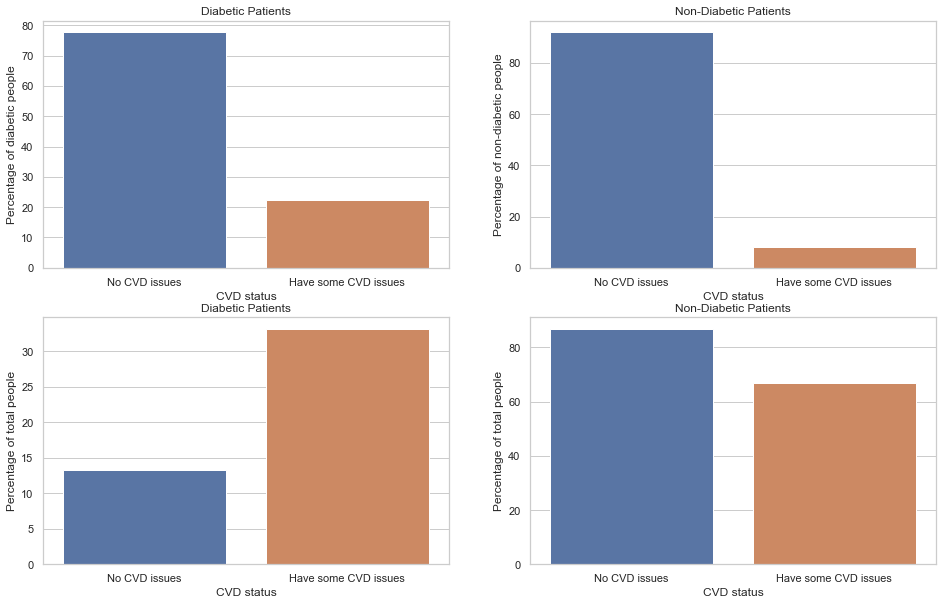

In [53]:
# barplot to understand the relationship 

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No CVD issues", "Have some CVD issues"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('CVD status')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('CVD status')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('CVD status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('CVD status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Some relation is there among people who have some CVD and diabetes.

######  Relationship with variable PhysActivity

In [54]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['PhysActivity'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['PhysActivity'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['PhysActivity'] == 0].shape[0]/df_diabetes[df_diabetes['PhysActivity'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['PhysActivity'] == 1].shape[0]/df_diabetes[df_diabetes['PhysActivity'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [55]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['PhysActivity'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['PhysActivity'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['PhysActivity'] == 0].shape[0]/df_diabetes[df_diabetes['PhysActivity'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['PhysActivity'] == 1].shape[0]/df_diabetes[df_diabetes['PhysActivity'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

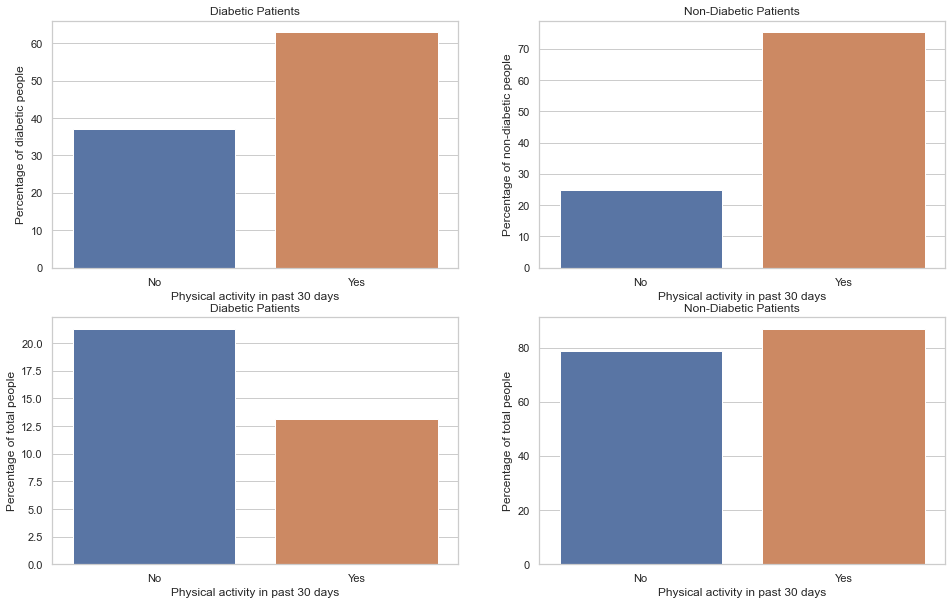

In [56]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Physical activity in past 30 days')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Physical activity in past 30 days')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Physical activity in past 30 days')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Physical activity in past 30 days')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

More people who suffer from diabetes are not physically active compare to those who don't have diabetes.

######  Relationship with variable Fruits

In [57]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['Fruits'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['Fruits'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['Fruits'] == 0].shape[0]/df_diabetes[df_diabetes['Fruits'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['Fruits'] == 1].shape[0]/df_diabetes[df_diabetes['Fruits'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [58]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['Fruits'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['Fruits'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['Fruits'] == 0].shape[0]/df_diabetes[df_diabetes['Fruits'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['Fruits'] == 1].shape[0]/df_diabetes[df_diabetes['Fruits'] == 1].shape[0])*100
value4 = [value3_no, value4_no]


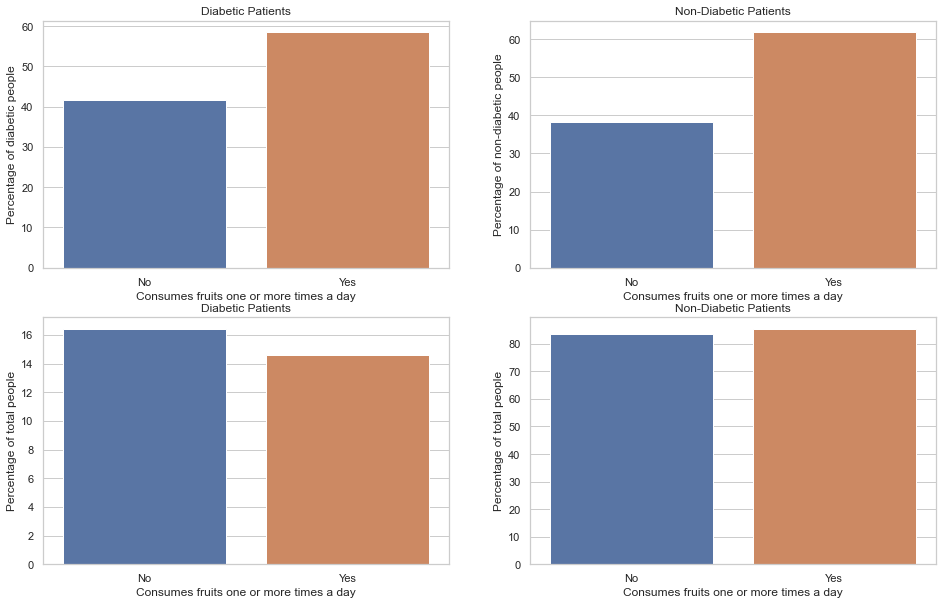

In [59]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Consumes fruits one or more times a day')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Consumes fruits one or more times a day')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Consumes fruits one or more times a day')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Consumes fruits one or more times a day')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Not a very conclusive relationship

######  Relationship with variable Veggies

In [60]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['Veggies'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['Veggies'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['Veggies'] == 0].shape[0]/df_diabetes[df_diabetes['Veggies'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['Veggies'] == 1].shape[0]/df_diabetes[df_diabetes['Veggies'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [61]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['Veggies'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['Veggies'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['Veggies'] == 0].shape[0]/df_diabetes[df_diabetes['Veggies'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['Veggies'] == 1].shape[0]/df_diabetes[df_diabetes['Veggies'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

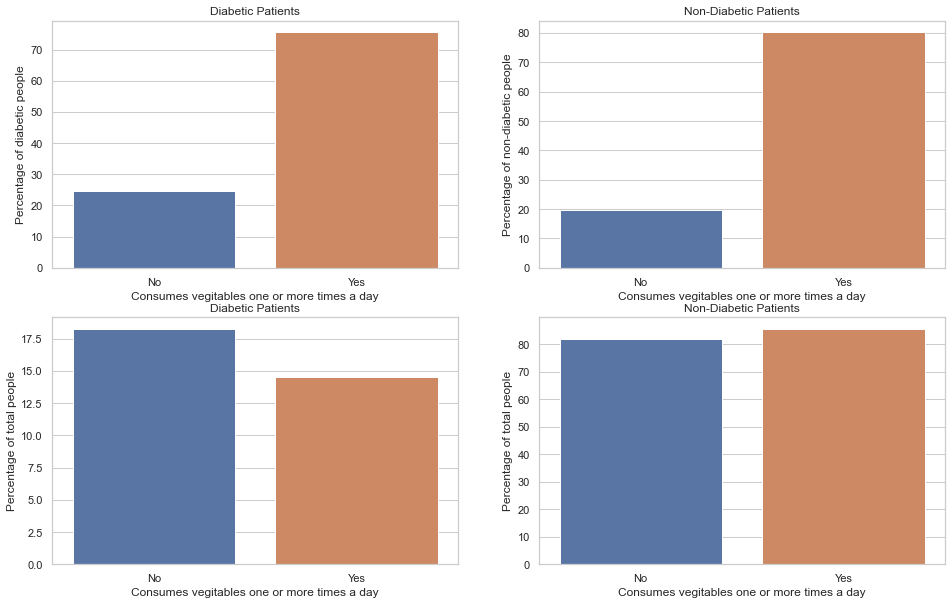

In [62]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Consumes vegitables one or more times a day')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Consumes vegitables one or more times a day')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Consumes vegitables one or more times a day')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Consumes vegitables one or more times a day')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Not a very conclusive relationship

######  Relationship with variable HvyAlcoholConsump

In [63]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['HvyAlcoholConsump'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['HvyAlcoholConsump'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['HvyAlcoholConsump'] == 0].shape[0]/df_diabetes[df_diabetes['HvyAlcoholConsump'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['HvyAlcoholConsump'] == 1].shape[0]/df_diabetes[df_diabetes['HvyAlcoholConsump'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [64]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['HvyAlcoholConsump'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['HvyAlcoholConsump'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['HvyAlcoholConsump'] == 0].shape[0]/df_diabetes[df_diabetes['HvyAlcoholConsump'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['HvyAlcoholConsump'] == 1].shape[0]/df_diabetes[df_diabetes['HvyAlcoholConsump'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

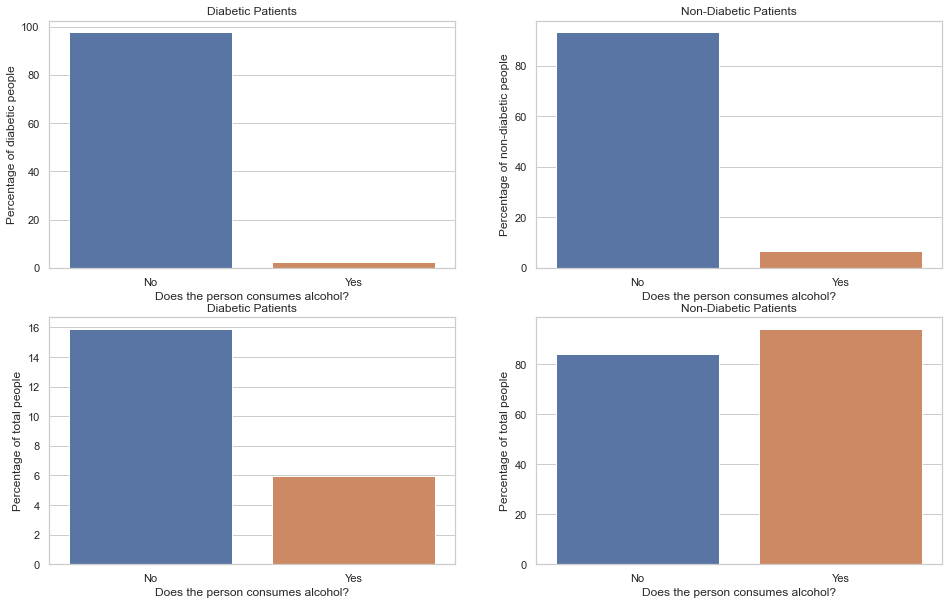

In [65]:
# barplot to understand the relationship 

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Does the person consumes alcohol?')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Does the person consumes alcohol?')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Does the person consumes alcohol?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Does the person consumes alcohol?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Not a very conclusive relationship

###### Relationship with variable AnyHealthcare

In [66]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['AnyHealthcare'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['AnyHealthcare'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['AnyHealthcare'] == 0].shape[0]/df_diabetes[df_diabetes['AnyHealthcare'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['AnyHealthcare'] == 1].shape[0]/df_diabetes[df_diabetes['AnyHealthcare'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [67]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['AnyHealthcare'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['AnyHealthcare'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['AnyHealthcare'] == 0].shape[0]/df_diabetes[df_diabetes['AnyHealthcare'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['AnyHealthcare'] == 1].shape[0]/df_diabetes[df_diabetes['AnyHealthcare'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

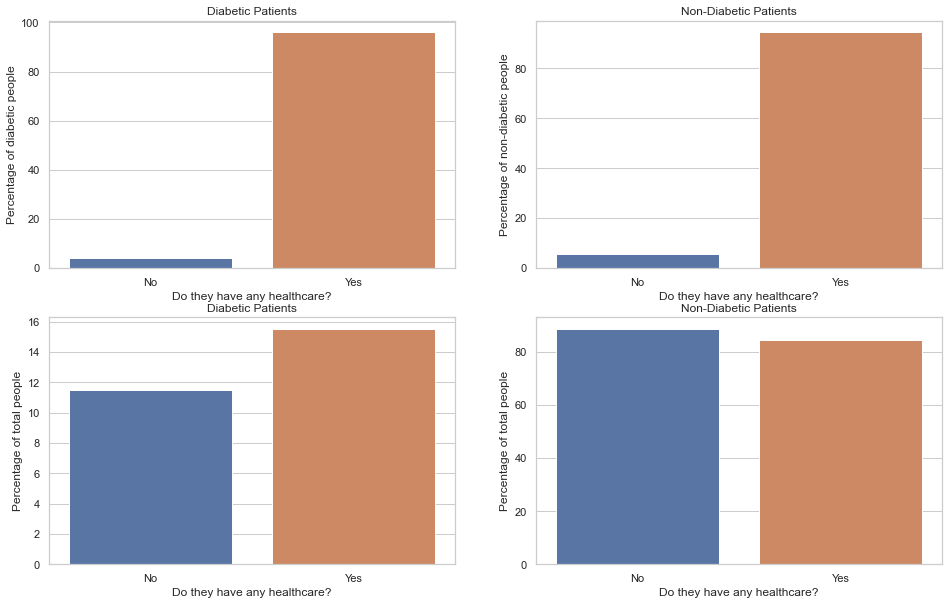

In [68]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Do they have any healthcare?')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have any healthcare?')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Do they have any healthcare?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have any healthcare?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Not a very conclusive relationship

###### Relationship with variable NoDocbcCost

In [69]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['NoDocbcCost'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['NoDocbcCost'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['NoDocbcCost'] == 0].shape[0]/df_diabetes[df_diabetes['NoDocbcCost'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['NoDocbcCost'] == 1].shape[0]/df_diabetes[df_diabetes['NoDocbcCost'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [70]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['NoDocbcCost'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['NoDocbcCost'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['NoDocbcCost'] == 0].shape[0]/df_diabetes[df_diabetes['NoDocbcCost'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['NoDocbcCost'] == 1].shape[0]/df_diabetes[df_diabetes['NoDocbcCost'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

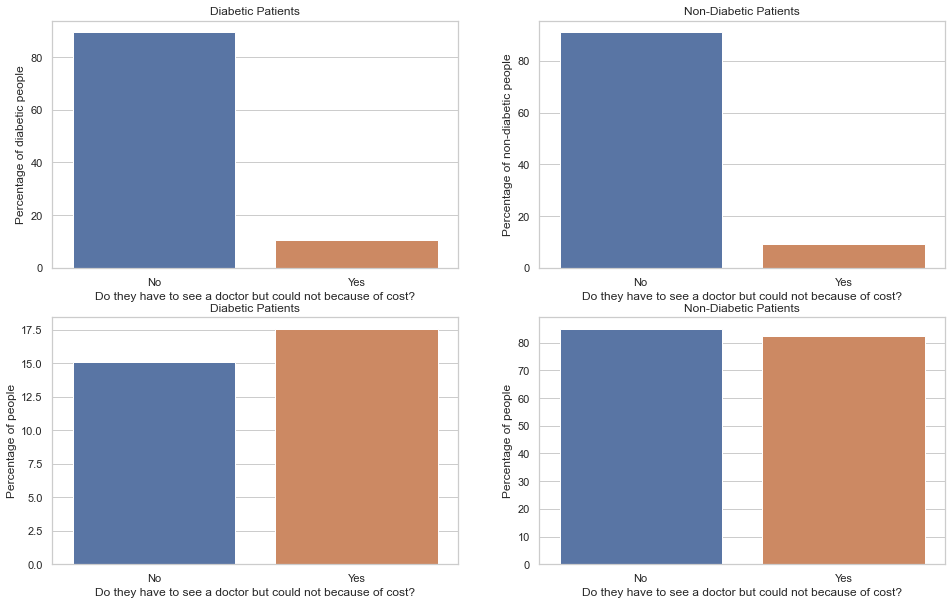

In [71]:
# barplot to understand the relationship

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Do they have to see a doctor but could not because of cost?')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have to see a doctor but could not because of cost?')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Do they have to see a doctor but could not because of cost?')
plt.ylabel('Percentage of people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have to see a doctor but could not because of cost?')
plt.ylabel('Percentage of people')
sns.barplot(label, value4)

plt.show()

Not a very conclusive relationship

###### Realionship with variable DiffWalk

In [72]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['DiffWalk'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['DiffWalk'] == 1].shape[0]/diabetes_yes.shape[0])*100
value1 = [value1_yes, value2_yes]

value3_yes = (diabetes_yes[diabetes_yes['DiffWalk'] == 0].shape[0]/df_diabetes[df_diabetes['DiffWalk'] == 0].shape[0])*100
value4_yes = (diabetes_yes[diabetes_yes['DiffWalk'] == 1].shape[0]/df_diabetes[df_diabetes['DiffWalk'] == 1].shape[0])*100
value3 = [value3_yes, value4_yes]

In [73]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['DiffWalk'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['DiffWalk'] == 1].shape[0]/diabetes_no.shape[0])*100
value2 = [value1_no, value2_no]

value3_no = (diabetes_no[diabetes_no['DiffWalk'] == 0].shape[0]/df_diabetes[df_diabetes['DiffWalk'] == 0].shape[0])*100
value4_no = (diabetes_no[diabetes_no['DiffWalk'] == 1].shape[0]/df_diabetes[df_diabetes['DiffWalk'] == 1].shape[0])*100
value4 = [value3_no, value4_no]

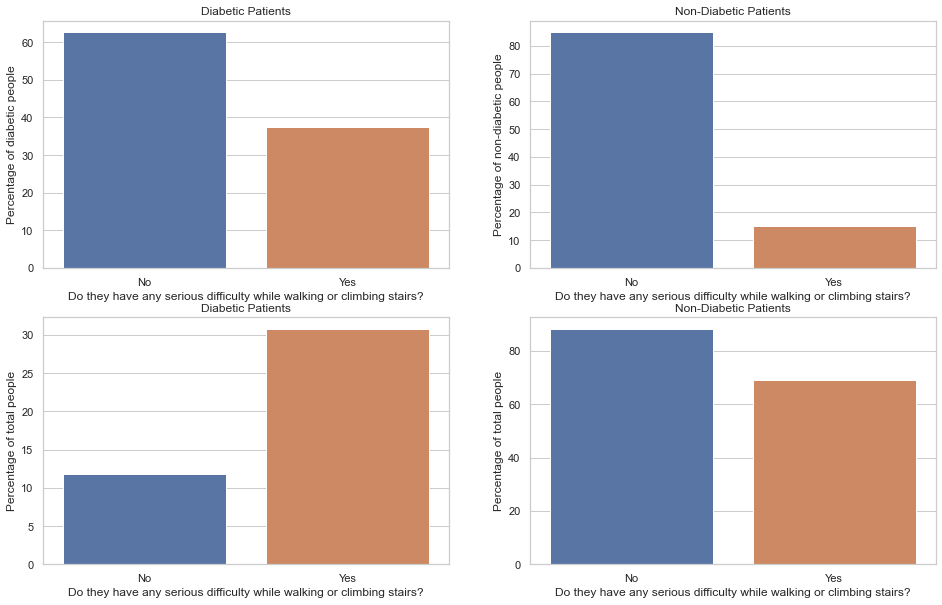

In [74]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid")
label = ["No", "Yes"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('Do they have any serious difficulty while walking or climbing stairs?')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have any serious difficulty while walking or climbing stairs?')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('Do they have any serious difficulty while walking or climbing stairs?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('Do they have any serious difficulty while walking or climbing stairs?')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)


plt.show()

There is a strong relationship among diabetic people and people who have issues climbing stairs.

###### Relationship with variable Sex

In [75]:
# calculating value for diabetic people

value1_yes = (diabetes_yes[diabetes_yes['Sex'] == 0].shape[0]/diabetes_yes.shape[0])*100
value2_yes = (diabetes_yes[diabetes_yes['Sex'] == 1].shape[0]/diabetes_yes.shape[0])*100

value1 = [value1_yes, value2_yes]
label = ["Female", "Male"]

In [76]:
# calculating value for non diabetic people

value1_no = (diabetes_no[diabetes_no['Sex'] == 0].shape[0]/diabetes_no.shape[0])*100
value2_no = (diabetes_no[diabetes_no['Sex'] == 1].shape[0]/diabetes_no.shape[0])*100

value2 = [value1_no, value2_no]
label = ["Female", "Male"]

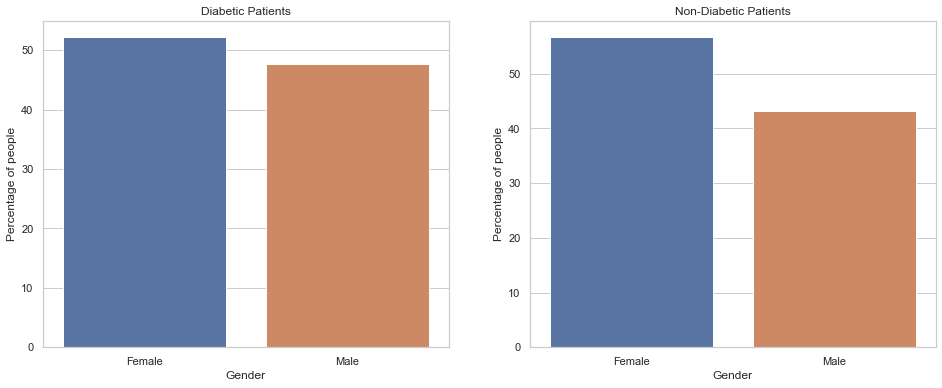

In [77]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage of people')
sns.barplot(label, value1)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage of people')
sns.barplot(label, value2)

plt.show()

###### Relationship with variable GenHlth

In [78]:
# calculating value for diabetic people

value1 = list()
value1.append((diabetes_yes[diabetes_yes['GenHlth'] == "1"].shape[0]/diabetes_yes.shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['GenHlth'] == "2"].shape[0]/diabetes_yes.shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['GenHlth'] == "3"].shape[0]/diabetes_yes.shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['GenHlth'] == "4"].shape[0]/diabetes_yes.shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['GenHlth'] == "5"].shape[0]/diabetes_yes.shape[0])*100)

value3 = list()
value3.append((diabetes_yes[diabetes_yes['GenHlth'] == "1"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "1"].shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['GenHlth'] == "2"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "2"].shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['GenHlth'] == "3"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "3"].shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['GenHlth'] == "4"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "4"].shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['GenHlth'] == "5"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "5"].shape[0])*100)


In [79]:
# calculating value for diabetic people

value2 = list()
value2.append((diabetes_no[diabetes_no['GenHlth'] == "1"].shape[0]/diabetes_no.shape[0])*100)
value2.append((diabetes_no[diabetes_no['GenHlth'] == "2"].shape[0]/diabetes_no.shape[0])*100)
value2.append((diabetes_no[diabetes_no['GenHlth'] == "3"].shape[0]/diabetes_no.shape[0])*100)
value2.append((diabetes_no[diabetes_no['GenHlth'] == "4"].shape[0]/diabetes_no.shape[0])*100)
value2.append((diabetes_no[diabetes_no['GenHlth'] == "5"].shape[0]/diabetes_no.shape[0])*100)

value4 = list()
value4.append((diabetes_no[diabetes_no['GenHlth'] == "1"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "1"].shape[0])*100)
value4.append((diabetes_no[diabetes_no['GenHlth'] == "2"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "2"].shape[0])*100)
value4.append((diabetes_no[diabetes_no['GenHlth'] == "3"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "3"].shape[0])*100)
value4.append((diabetes_no[diabetes_no['GenHlth'] == "4"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "4"].shape[0])*100)
value4.append((diabetes_no[diabetes_no['GenHlth'] == "5"].shape[0]/df_diabetes[df_diabetes['GenHlth'] == "5"].shape[0])*100)

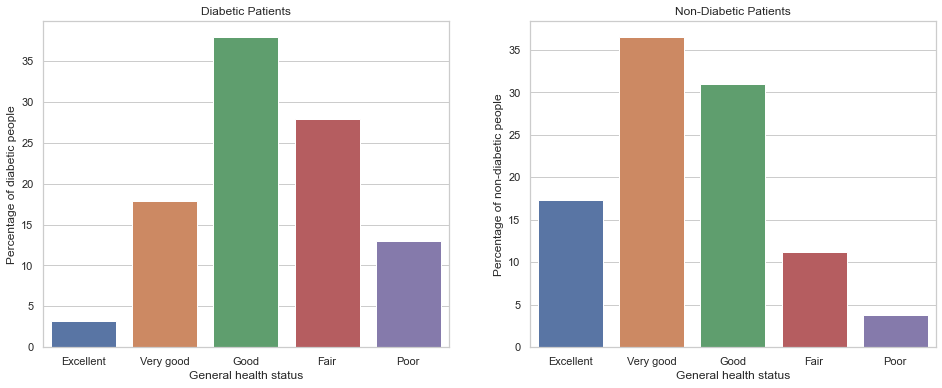

In [80]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")
label = ["Excellent", "Very good", "Good", "Fair", "Poor"]

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('General health status')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('General health status')
plt.ylabel('Percentage of non-diabetic people')
sns.barplot(label, value2)

plt.show()

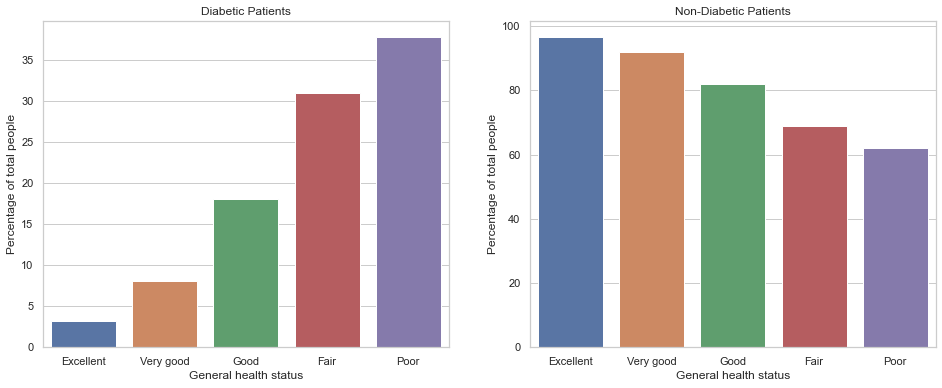

In [81]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")
label = ["Excellent", "Very good", "Good", "Fair", "Poor"]

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('General health status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('General health status')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

There is a relationship between general health variable and diabetes

###### Relationship with variable MentHlth

In [82]:
# calculating value for diabetic people

value1 = list()
value3 = list()
label = list()
for idx in range(0,31):
    value1.append((diabetes_yes[diabetes_yes['MentHlth'] == idx].shape[0]/diabetes_yes.shape[0])*100)
    value3.append((diabetes_yes[diabetes_yes['MentHlth'] == idx].shape[0]/df_diabetes[df_diabetes['MentHlth'] == idx].shape[0])*100)
    label.append(idx)

In [83]:
value2 = list()
value4 = list()
for idx in range(0,31):
    value2.append((diabetes_no[diabetes_no['MentHlth'] == idx].shape[0]/diabetes_no.shape[0])*100)
    value4.append((diabetes_no[diabetes_no['MentHlth'] == idx].shape[0]/df_diabetes[df_diabetes['MentHlth'] == idx].shape[0])*100)

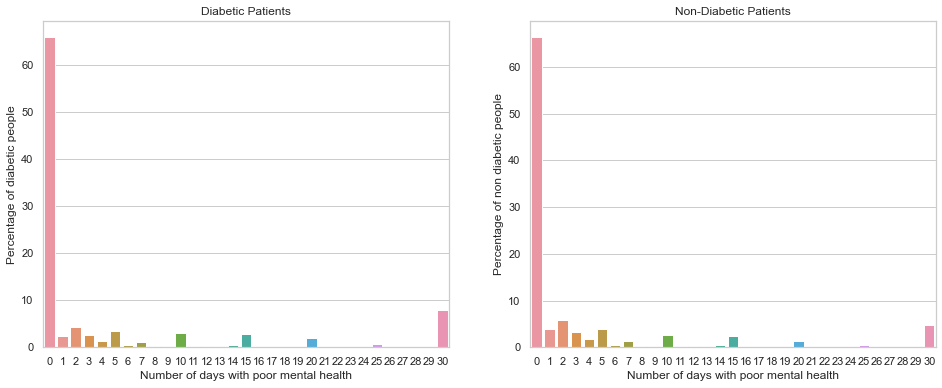

In [84]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('Number of days with poor mental health')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('Number of days with poor mental health')
plt.ylabel('Percentage of non diabetic people')
sns.barplot(label, value2)

plt.show()

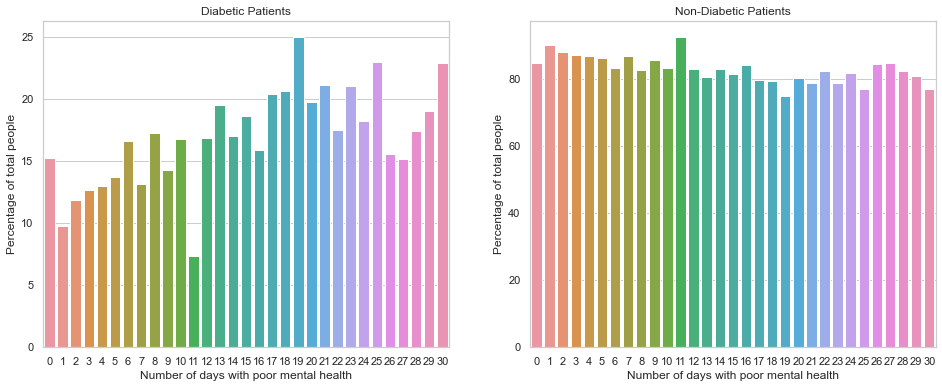

In [85]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('Number of days with poor mental health')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('Number of days with poor mental health')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Not very conclusive result here

###### Relationship with variable PhysHlth

In [86]:
# calculating value for diabetic people

value1 = list()
value3 = list()
label = list()
for idx in range(0,31):
    value1.append((diabetes_yes[diabetes_yes['PhysHlth'] == idx].shape[0]/diabetes_yes.shape[0])*100)
    value3.append((diabetes_yes[diabetes_yes['PhysHlth'] == idx].shape[0]/df_diabetes[df_diabetes['PhysHlth'] == idx].shape[0])*100)
    label.append(idx)

In [87]:
value2 = list()
value4 = list()
for idx in range(0,31):
    value2.append((diabetes_no[diabetes_no['PhysHlth'] == idx].shape[0]/diabetes_no.shape[0])*100)
    value4.append((diabetes_no[diabetes_no['PhysHlth'] == idx].shape[0]/df_diabetes[df_diabetes['PhysHlth'] == idx].shape[0])*100)

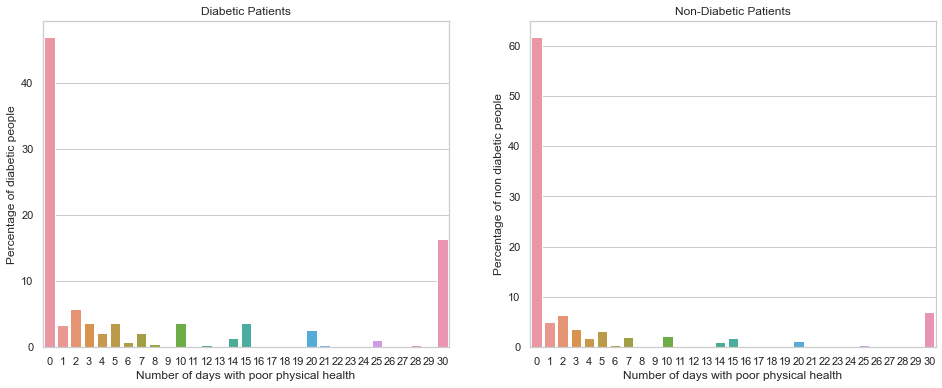

In [88]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('Number of days with poor physical health')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('Number of days with poor physical health')
plt.ylabel('Percentage of non diabetic people')
sns.barplot(label, value2)

plt.show()

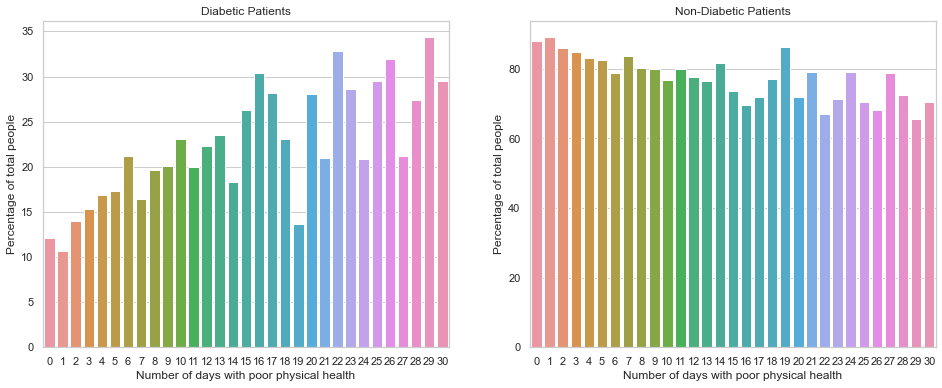

In [89]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,6))

sns.set_theme(style="whitegrid")

plt.subplot(121)
plt.title('Diabetic Patients')
plt.xlabel('Number of days with poor physical health')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(122)
plt.title('Non-Diabetic Patients')
plt.xlabel('Number of days with poor physical health')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

Diabetic patients have more days with poor physical health

###### Relationship with variable Age

In [90]:
# calculating value for diabetic people

value1 = list()
value3 = list()
for idx in range(1,14):
    value1.append((diabetes_yes[diabetes_yes['Age'] == str(idx)].shape[0]/diabetes_yes.shape[0])*100)
    value3.append((diabetes_yes[diabetes_yes['Age'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Age'] == str(idx)].shape[0])*100)    

In [91]:
value2 = list()
value4 = list()
for idx in range(1,14):
    value2.append((diabetes_no[diabetes_no['Age'] == str(idx)].shape[0]/diabetes_no.shape[0])*100)
    value4.append((diabetes_no[diabetes_no['Age'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Age'] == str(idx)].shape[0])*100)

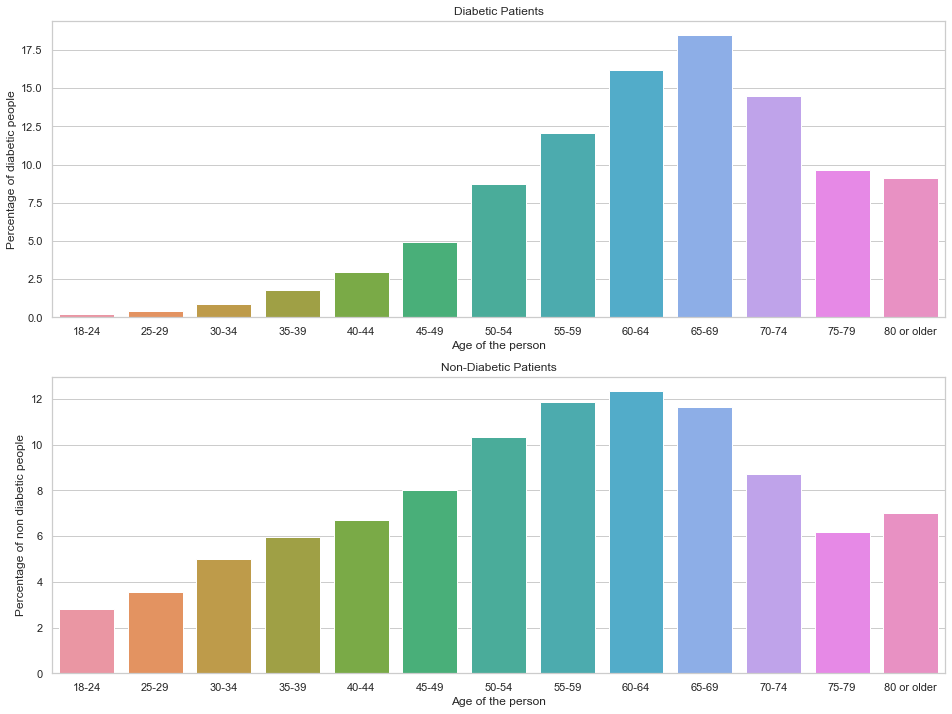

In [92]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80 or older"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Age of the person')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Age of the person')
plt.ylabel('Percentage of non diabetic people')
sns.barplot(label, value2)

plt.show()

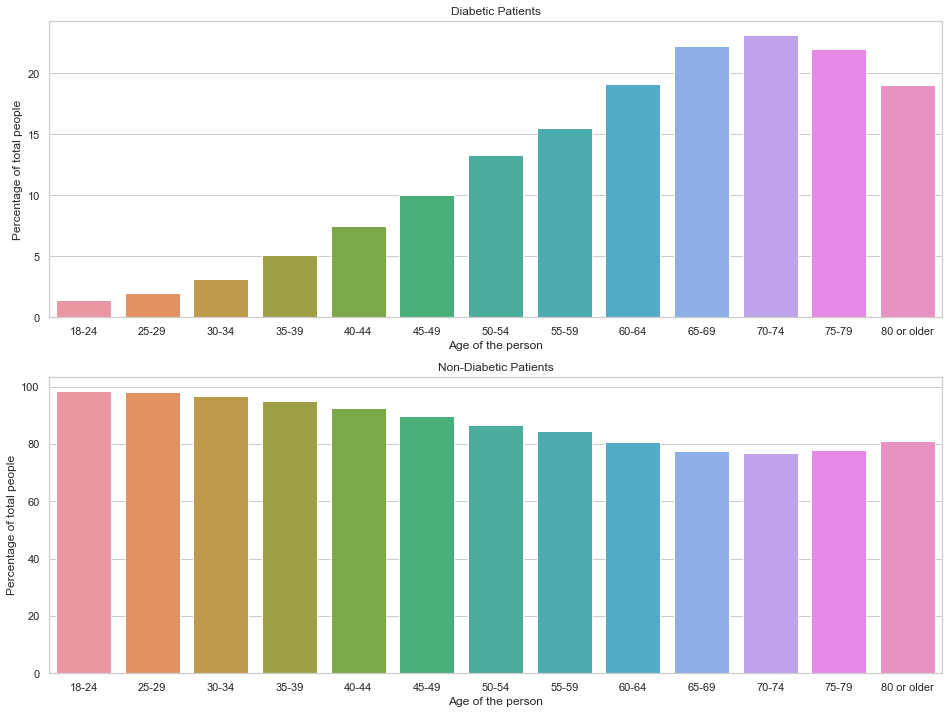

In [93]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80 or older"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Age of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Age of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

###### Relationship with variable Education

In [94]:
# calculating value for diabetic people

value1 = list()
value3 = list()
for idx in range(1,7):
    value1.append((diabetes_yes[diabetes_yes['Education'] == str(idx)].shape[0]/diabetes_yes.shape[0])*100)
    value3.append((diabetes_yes[diabetes_yes['Education'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Education'] == str(idx)].shape[0])*100)

In [95]:
value2 = list()
value4 = list()
for idx in range(1,7):
    value2.append((diabetes_no[diabetes_no['Education'] == str(idx)].shape[0]/diabetes_no.shape[0])*100)
    value4.append((diabetes_no[diabetes_no['Education'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Education'] == str(idx)].shape[0])*100)

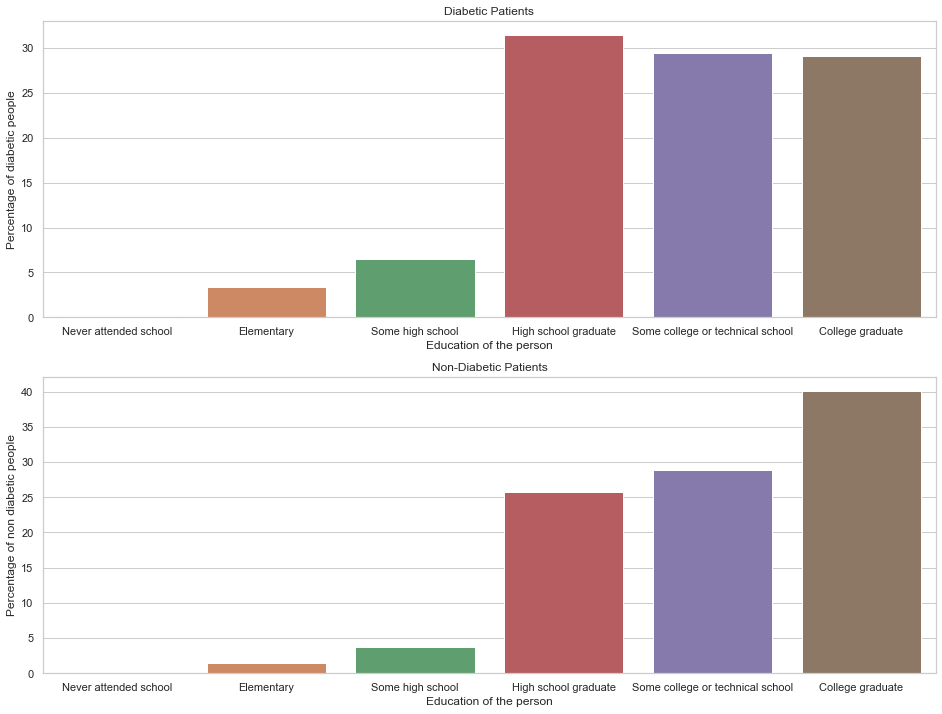

In [96]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["Never attended school","Elementary", "Some high school", "High school graduate","Some college or technical school","College graduate"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Education of the person')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Education of the person')
plt.ylabel('Percentage of non diabetic people')
sns.barplot(label, value2)

plt.show()

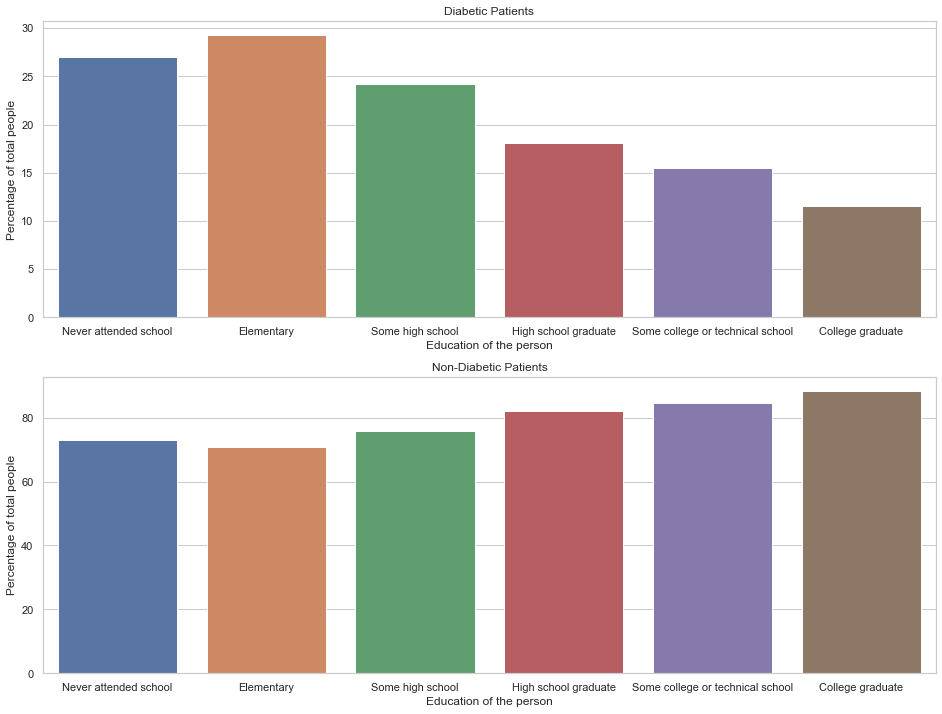

In [97]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["Never attended school","Elementary", "Some high school", "High school graduate","Some college or technical school","College graduate"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Education of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Education of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

###### Relationship with variable Income

In [98]:
# calculating value for diabetic people

value1 = list()
value3 = list()
for idx in range(1,9):
    value1.append((diabetes_yes[diabetes_yes['Income'] == str(idx)].shape[0]/diabetes_yes.shape[0])*100)
    value3.append((diabetes_yes[diabetes_yes['Income'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Income'] == str(idx)].shape[0])*100)

In [99]:
value2 = list()
value4 = list()
for idx in range(1,9):
    value2.append((diabetes_no[diabetes_no['Income'] == str(idx)].shape[0]/diabetes_no.shape[0])*100)
    value4.append((diabetes_no[diabetes_no['Income'] == str(idx)].shape[0]/df_diabetes[df_diabetes['Income'] == str(idx)].shape[0])*100)

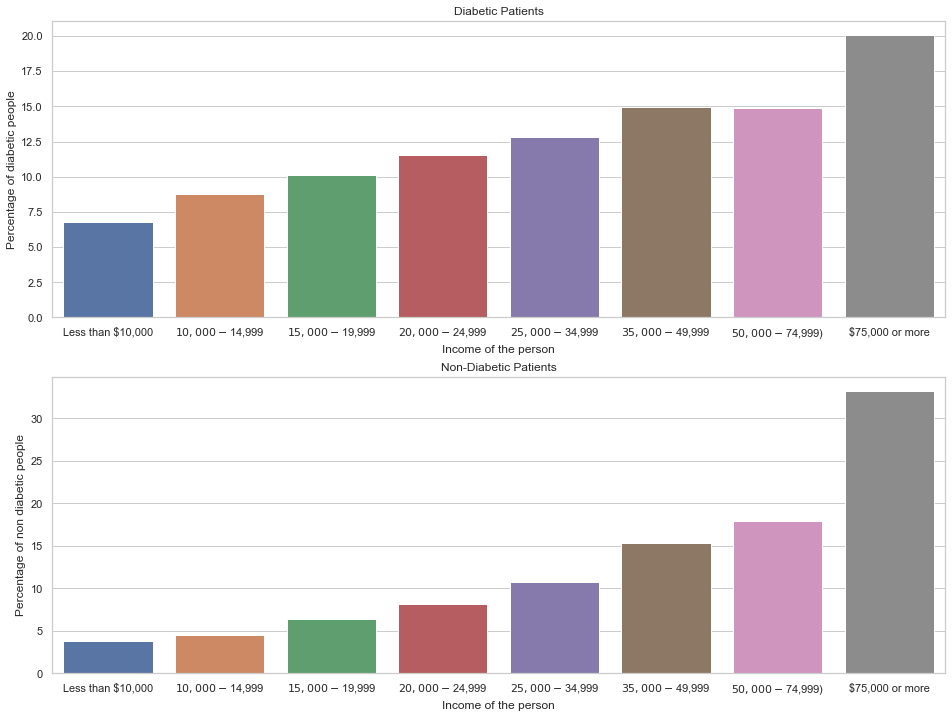

In [100]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$74,999)","$75,000 or more"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Income of the person')
plt.ylabel('Percentage of diabetic people')
sns.barplot(label, value1)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Income of the person')
plt.ylabel('Percentage of non diabetic people')
sns.barplot(label, value2)

plt.show()

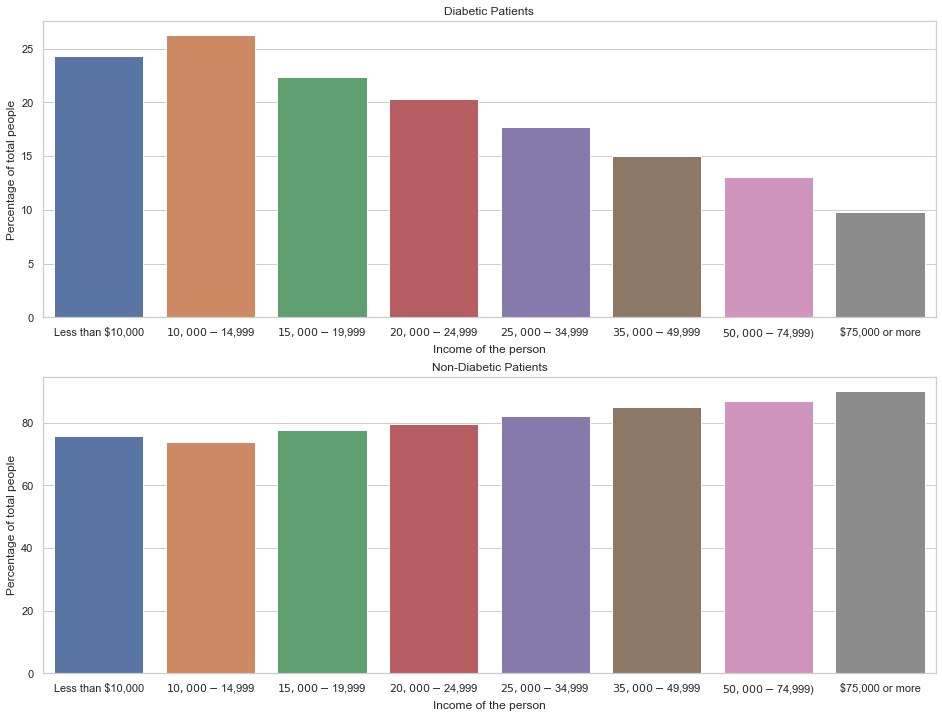

In [101]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(16,12))

sns.set_theme(style="whitegrid")
label = ["Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$74,999)","$75,000 or more"]

plt.subplot(211)
plt.title('Diabetic Patients')
plt.xlabel('Income of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value3)

plt.subplot(212)
plt.title('Non-Diabetic Patients')
plt.xlabel('Income of the person')
plt.ylabel('Percentage of total people')
sns.barplot(label, value4)

plt.show()

###### Relationship with variable BMI

In [102]:
# calculating value for diabetic people

value1 = list()
value1.append((diabetes_yes[diabetes_yes['BMI_status'] == "Underweight"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Underweight"].shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['BMI_status'] == "Normal"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Normal"].shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['BMI_status'] == "Overweight"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Overweight"].shape[0])*100)
value1.append((diabetes_yes[diabetes_yes['BMI_status'] == "Obese"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Obese"].shape[0])*100)

# calculating value for diabetic people

value3 = list()
value3.append((diabetes_yes[diabetes_yes['BMI_status'] == "Underweight"].shape[0]/diabetes_yes.shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['BMI_status'] == "Normal"].shape[0]/diabetes_yes.shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['BMI_status'] == "Overweight"].shape[0]/diabetes_yes.shape[0])*100)
value3.append((diabetes_yes[diabetes_yes['BMI_status'] == "Obese"].shape[0]/diabetes_yes.shape[0])*100)

In [103]:
# calculating value for diabetic people

value2 = list()
value2.append((diabetes_no[diabetes_no['BMI_status'] == "Underweight"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Underweight"].shape[0])*100)
value2.append((diabetes_no[diabetes_no['BMI_status'] == "Normal"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Normal"].shape[0])*100)
value2.append((diabetes_no[diabetes_no['BMI_status'] == "Overweight"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Overweight"].shape[0])*100)
value2.append((diabetes_no[diabetes_no['BMI_status'] == "Obese"].shape[0]/df_diabetes[df_diabetes['BMI_status'] == "Obese"].shape[0])*100)

value4 = list()
value4.append((diabetes_no[diabetes_no['BMI_status'] == "Underweight"].shape[0]/diabetes_no.shape[0])*100)
value4.append((diabetes_no[diabetes_no['BMI_status'] == "Normal"].shape[0]/diabetes_no.shape[0])*100)
value4.append((diabetes_no[diabetes_no['BMI_status'] == "Overweight"].shape[0]/diabetes_no.shape[0])*100)
value4.append((diabetes_no[diabetes_no['BMI_status'] == "Obese"].shape[0]/diabetes_no.shape[0])*100)

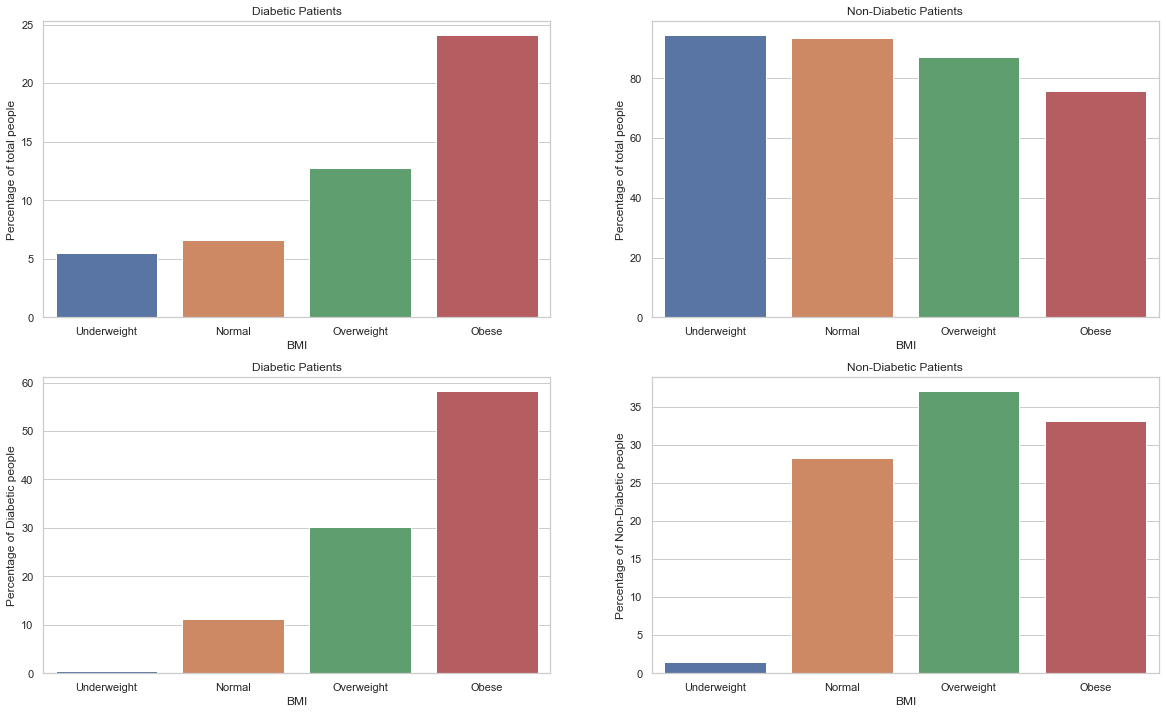

In [104]:
# barplot to understand the relationship of diabetes and cholestrol

plt.figure(figsize=(20,12))

sns.set_theme(style="whitegrid")
label = ["Underweight", "Normal", "Overweight", "Obese"]

plt.subplot(221)
plt.title('Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Percentage of total people')
sns.barplot(label, value1)

plt.subplot(222)
plt.title('Non-Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Percentage of total people')
sns.barplot(label, value2)

plt.subplot(223)
plt.title('Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Percentage of Diabetic people')
sns.barplot(label, value3)

plt.subplot(224)
plt.title('Non-Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Percentage of Non-Diabetic people')
sns.barplot(label, value4)

plt.show()

BMI is strongly related to diabetic people. As BMI is progressing from Underweight to Obese, the number of diabtetic people are increasing.

#### Preparing Data

In [105]:
df_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_status
0,0,1,1,1,40.0,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,Obese
1,0,0,0,0,25.0,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,Overweight
2,0,1,1,1,28.0,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,Overweight
3,0,1,0,1,27.0,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,Overweight
4,0,1,1,1,24.0,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,Normal


As we already created BMI_status in our data for BMI then variable BMI can be removed

In [106]:
df_diabetes.drop('BMI_status', axis=1, inplace=True)

In [107]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int32  
 1   HighBP                229474 non-null  int32  
 2   HighChol              229474 non-null  int32  
 3   CholCheck             229474 non-null  int32  
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  int32  
 6   Stroke                229474 non-null  int32  
 7   HeartDiseaseorAttack  229474 non-null  int32  
 8   PhysActivity          229474 non-null  int32  
 9   Fruits                229474 non-null  int32  
 10  Veggies               229474 non-null  int32  
 11  HvyAlcoholConsump     229474 non-null  int32  
 12  AnyHealthcare         229474 non-null  int32  
 13  NoDocbcCost           229474 non-null  int32  
 14  GenHlth               229474 non-null  object 
 15  

In [108]:
df_diabetes['GenHlth'] = df_diabetes['GenHlth'].astype(int)
df_diabetes['Age'] = df_diabetes['Age'].astype(int)
df_diabetes['Education'] = df_diabetes['Education'].astype(int)
df_diabetes['Income'] = df_diabetes['Income'].astype(int)

In our dataset we have a few numeric variables which holds data in categorical format. Means, their value corresponds to a categorical format data. We can create dummy variables fo those variables. It will allow us to check those values individually.

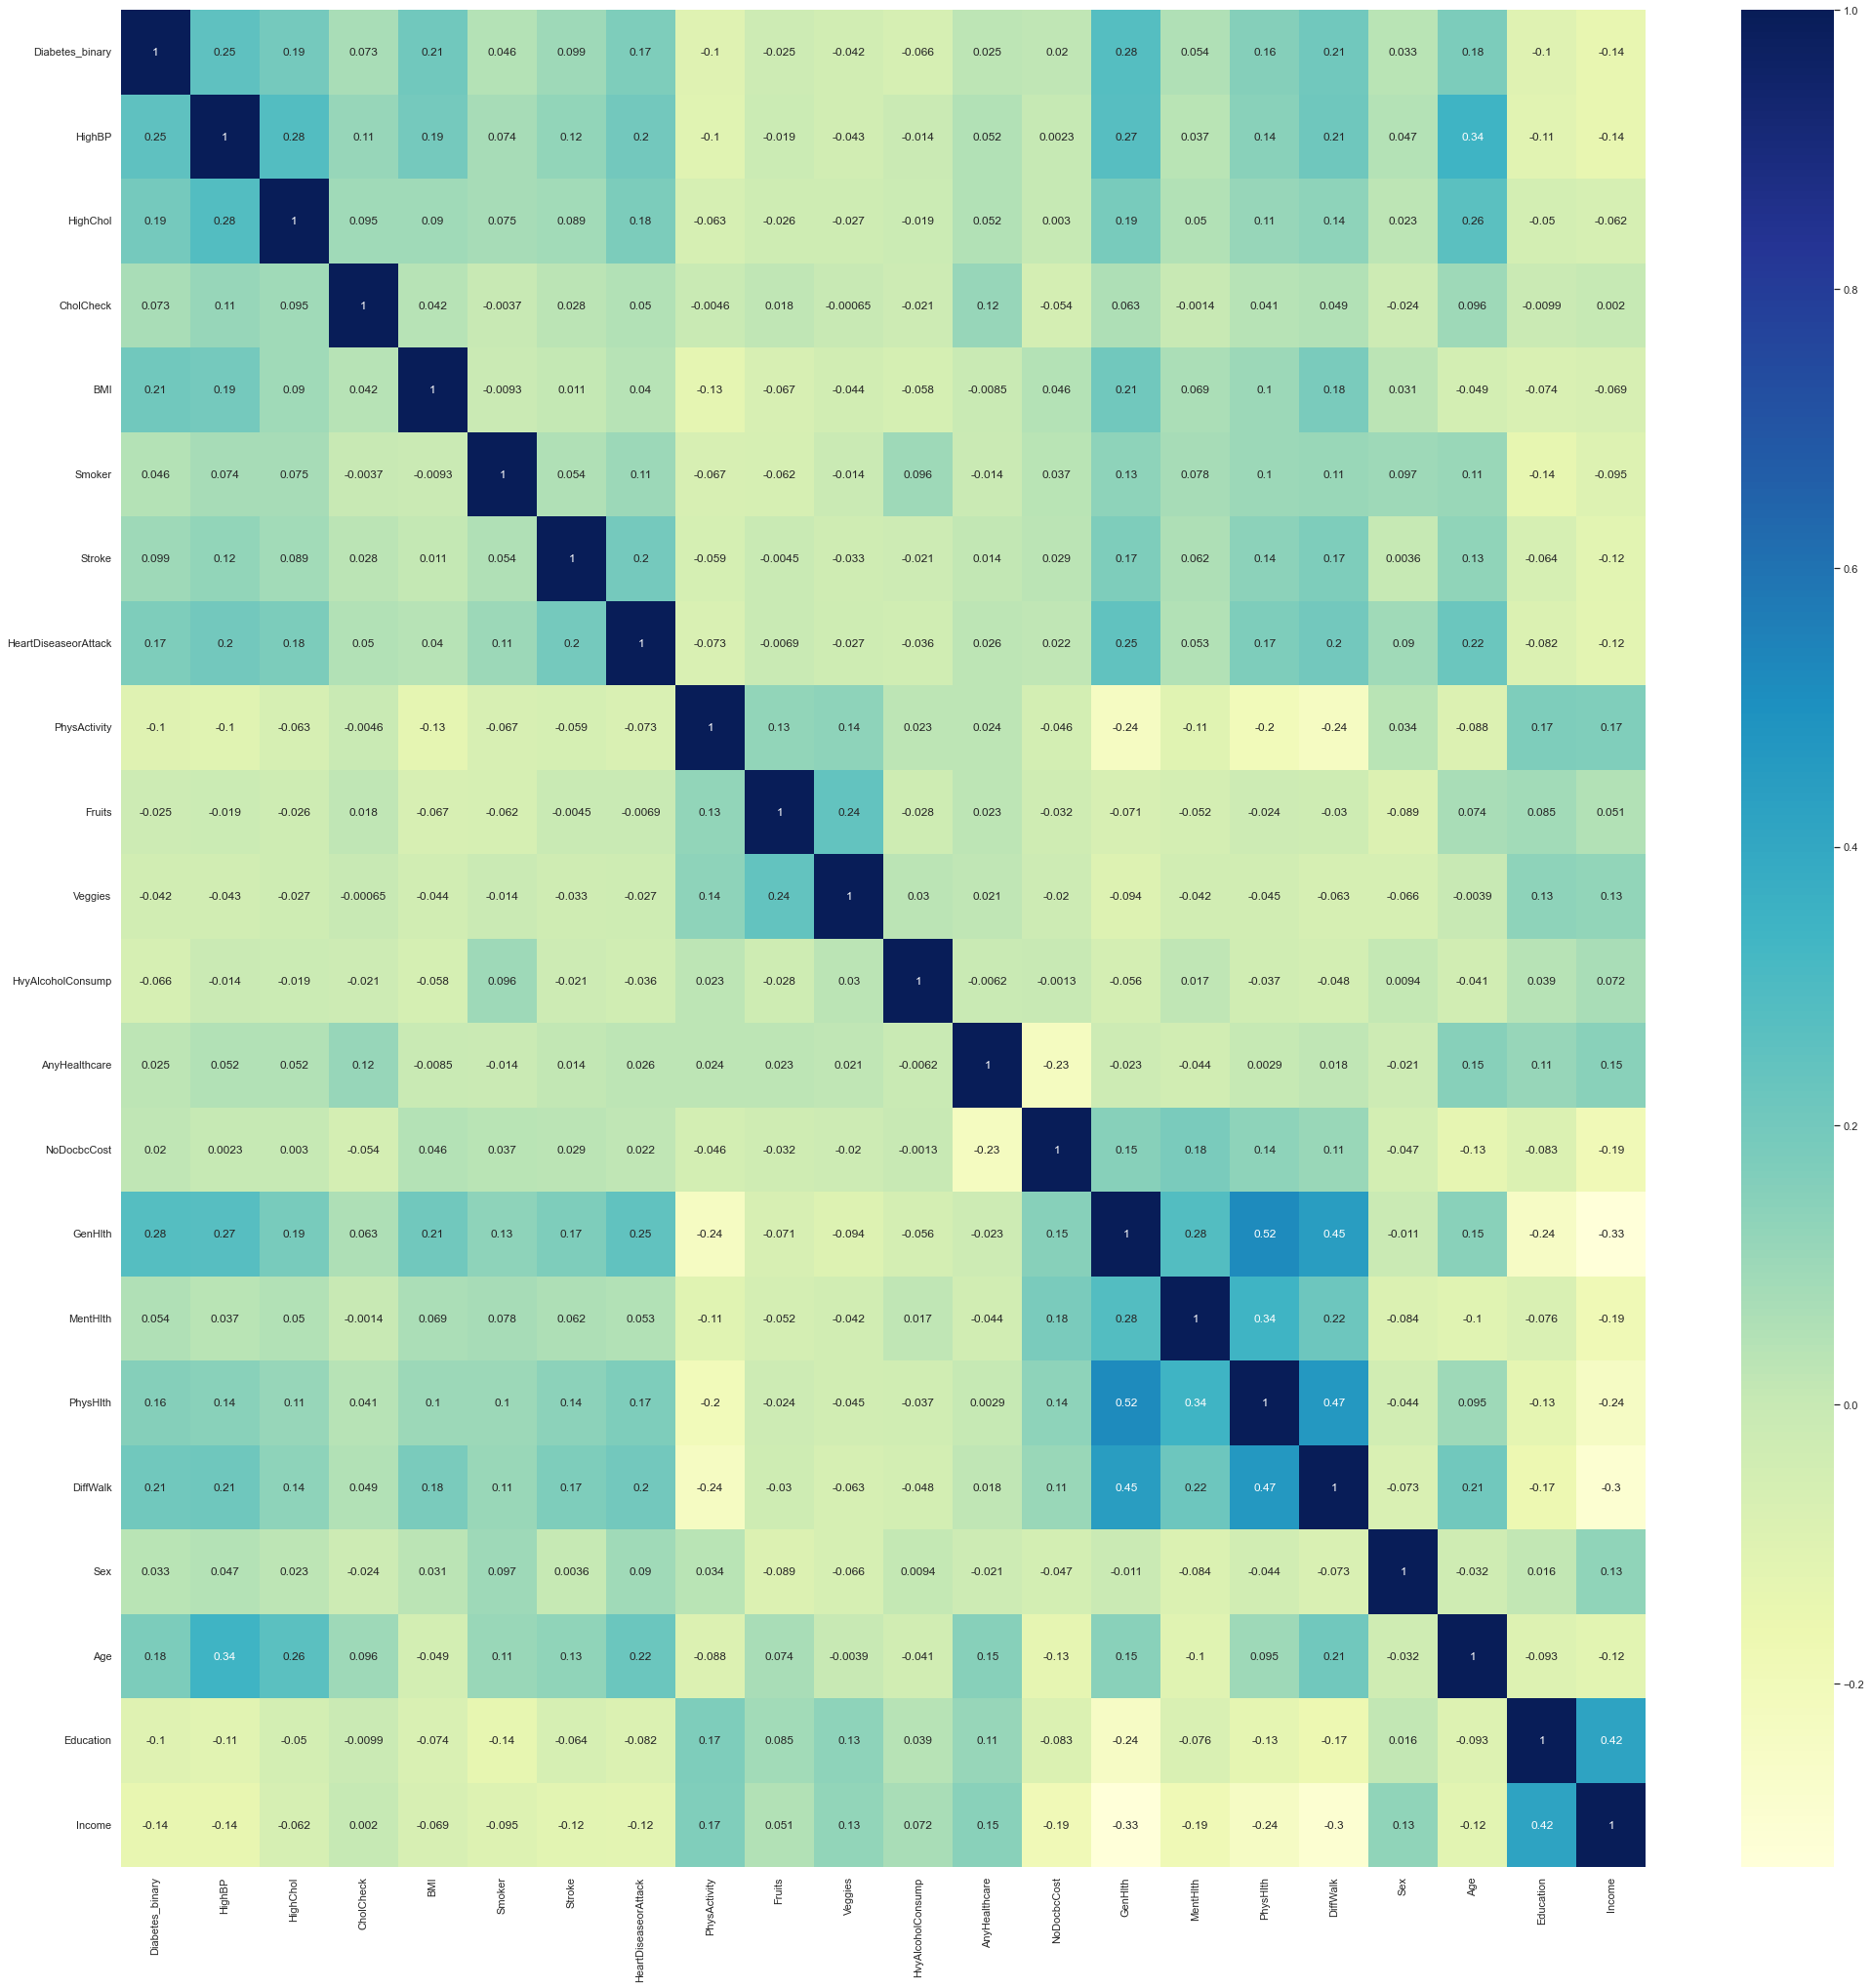

In [109]:
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df_diabetes.corr(), cmap="YlGnBu", annot = True, ax= ax)
plt.show()

In [110]:
# df_diabetes.drop(['Sex'],axis=1,inplace=True)

## MODELS START FROM HERE

#### LOGISTIC REGRESSION

Lets first divide our dataset into train and test

In [111]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 

# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [112]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [114]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (160631, 21)
Number transactions y_train dataset:  (160631,)
Number transactions X_test dataset:  (68843, 21)
Number transactions y_test dataset:  (68843,)


###### Feature Scaling

In [115]:
# Importing for Scaling
from sklearn.preprocessing import StandardScaler

In [116]:
# Scaling the nnumeric variables to bring them all in a single scale

scaler = StandardScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)

In [117]:
X_train = pd.DataFrame(X_train)

In [118]:
X_train.columns = cols

In [119]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.097746,-0.888449,0.205226,-0.689882,-0.933624,-0.215299,-0.338416,0.603244,0.795442,0.509039,...,0.238816,-0.319151,0.377314,0.839932,2.252419,-0.477159,-0.883111,0.943573,1.027362,-0.425848
1,-0.910958,-0.888449,0.205226,-0.983852,-0.933624,-0.215299,-0.338416,0.603244,0.795442,0.509039,...,0.238816,-0.319151,-1.501548,0.062974,-0.516665,-0.477159,1.132361,-0.995410,1.027362,1.007946
2,1.097746,1.125557,0.205226,0.339015,-0.933624,-0.215299,-0.338416,-1.657704,-1.257163,0.509039,...,0.238816,-0.319151,0.377314,-0.325505,-0.516665,-0.477159,-0.883111,-0.025919,0.020393,0.530015
3,-0.910958,1.125557,0.205226,-0.542897,1.071095,-0.215299,-0.338416,-1.657704,0.795442,0.509039,...,0.238816,-0.319151,0.377314,-0.066519,-0.516665,-0.477159,-0.883111,0.297245,-0.986577,0.052083
4,1.097746,-0.888449,0.205226,1.220926,1.071095,-0.215299,-0.338416,-1.657704,0.795442,-1.964488,...,0.238816,-0.319151,2.256177,3.429793,2.806236,2.095736,1.132361,-0.672246,-0.986577,-0.903780


###### Implementing Smote to correct the Imbalance

In [120]:
# Import SMOTE to handle class imbalance

from imblearn.over_sampling import SMOTE

In [121]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 24394
Before OverSampling, counts of label '0': 136237 

After OverSampling, the shape of train_X: (272474, 21)
After OverSampling, the shape of train_y: (272474,) 

After OverSampling, counts of label '1': 136237
After OverSampling, counts of label '0': 136237


In [122]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

In [123]:
# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

###### Implementing LR to create a model

In [124]:
# VIF function
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [125]:
import statsmodels.api as sm
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Create a model with all the parameters

In [126]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Diabetes_binary   No. Observations:               272474
Model:                            GLM   Df Residuals:                   272452
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4289e+05
Date:                Thu, 16 Jun 2022   Deviance:                   2.8578e+05
Time:                        12:08:19   Pearson chi2:                 2.81e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6190 

In [127]:
# Predicting the probabilities

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.389840
1    0.045959
2    0.626496
3    0.377890
4    0.761786
5    0.107947
6    0.488554
7    0.035918
8    0.122598
9    0.850752
dtype: float64

In [128]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38983977, 0.04595872, 0.62649648, 0.37789016, 0.76178644,
       0.10794675, 0.48855385, 0.03591782, 0.12259808, 0.85075152])

In [129]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Default':np.squeeze(y_train.values), 'Default_Prob':y_train_pred})
y_train_pred_final.head()

,Default,Default_Prob
0,0,0.389840
1,0,0.045959
2,0,0.626496
3,0,0.377890
4,0,0.761786


In [130]:
y_train_pred_final['Predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_Prob,Predicted
0,0,0.389840,0
1,0,0.045959,0
2,0,0.626496,1
3,0,0.377890,0
4,0,0.761786,1


In [131]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [132]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
print(confusion)

[[ 97377  38860]
 [ 31791 104446]]


In [133]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted))

0.740705535207029


###### Accessing the model with StatsModels

In [134]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [135]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('HighBP', True, 1),
 ('HighChol', True, 1),
 ('CholCheck', True, 1),
 ('BMI', True, 1),
 ('Smoker', False, 10),
 ('Stroke', False, 5),
 ('HeartDiseaseorAttack', False, 3),
 ('PhysActivity', False, 11),
 ('Fruits', False, 8),
 ('Veggies', False, 12),
 ('HvyAlcoholConsump', True, 1),
 ('AnyHealthcare', False, 9),
 ('NoDocbcCost', False, 7),
 ('GenHlth', True, 1),
 ('MentHlth', False, 2),
 ('PhysHlth', True, 1),
 ('DiffWalk', False, 4),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('Education', False, 6),
 ('Income', True, 1)]

In [136]:
col = X_train.columns[rfe.support_]

In [137]:
X_train = X_train[col]

###### Model #1

In [138]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Diabetes_binary   No. Observations:               272474
Model:                            GLM   Df Residuals:                   272463
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4311e+05
Date:                Thu, 16 Jun 2022   Deviance:                   2.8621e+05
Time:                        12:08:34   Pearson chi2:                 2.81e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6228      0.00

In [139]:
# Removed because of high VIF vallue

X_train.drop('Income', axis=1, inplace=True)

###### Model #2

In [140]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Diabetes_binary   No. Observations:               272474
Model:                            GLM   Df Residuals:                   272464
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4326e+05
Date:                Thu, 16 Jun 2022   Deviance:                   2.8651e+05
Time:                        12:08:37   Pearson chi2:                 2.81e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6227      0.00

In [141]:
# Predicting the probabilities

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.427794
1    0.046548
2    0.640951
3    0.390429
4    0.793301
5    0.088682
6    0.457317
7    0.025949
8    0.125815
9    0.855099
dtype: float64

In [142]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42779367, 0.04654833, 0.64095122, 0.39042857, 0.7933008 ,
       0.08868238, 0.45731688, 0.02594867, 0.12581468, 0.85509926])

In [143]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Default':np.squeeze(y_train.values), 'Default_Prob':y_train_pred})
y_train_pred_final.head()

,Default,Default_Prob
0,0,0.427794
1,0,0.046548
2,0,0.640951
3,0,0.390429
4,0,0.793301


In [144]:
y_train_pred_final['Predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_Prob,Predicted
0,0,0.427794,0
1,0,0.046548,0
2,0,0.640951,1
3,0,0.390429,0
4,0,0.793301,1


In [145]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [146]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
print(confusion)

[[ 96760  39477]
 [ 31401 104836]]


In [147]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted))

0.7398724281949838


In [148]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Calculate the sensitivity

TP/(TP+FN)

0.7695119534340891

In [150]:
# Calculate the specificity

TN/(TN+FP)

0.7102329029558784

In [151]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Default, y_train_pred_final.Default_Prob, drop_intermediate = False)

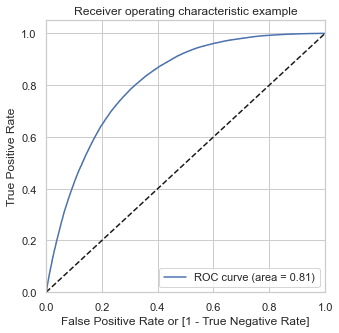

In [153]:
# Call the ROC function

draw_roc(y_train_pred_final.Default, y_train_pred_final.Default_Prob)

In [154]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.427794,0,1,1,1,1,1,0,0,0,0,0
1,0,0.046548,0,1,0,0,0,0,0,0,0,0,0
2,0,0.640951,1,1,1,1,1,1,1,1,0,0,0
3,0,0.390429,0,1,1,1,1,0,0,0,0,0,0
4,0,0.793301,1,1,1,1,1,1,1,1,1,0,0


In [155]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.591223  0.993959  0.188488
0.2   0.2  0.666845  0.969340  0.364350
0.3   0.3  0.713547  0.926635  0.500459
0.4   0.4  0.735384  0.859010  0.611757
0.5   0.5  0.739872  0.769512  0.710233
0.6   0.6  0.723842  0.649456  0.798227
0.7   0.7  0.679511  0.481411  0.877610
0.8   0.8  0.608425  0.272239  0.944611
0.9   0.9  0.528461  0.068535  0.988388


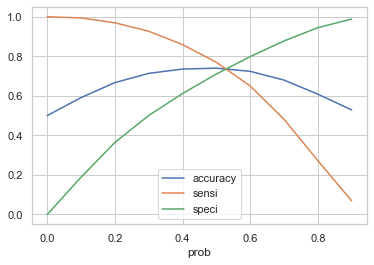

In [156]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.427794,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.046548,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.640951,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.390429,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.793301,1,1,1,1,1,1,1,1,1,0,0,1


In [158]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.7349581978464

In [159]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[102998,  33239],
       [ 38978,  97259]], dtype=int64)

In [160]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Calculate Sensitivity

TP/(TP+FN)

0.7138956377489228

In [162]:
# Calculate Specificity

TN/(TN+FP)

0.7560207579438772

In [163]:
cols = X_test.columns
X_test = scaler.transform(X_test)

In [164]:
X_test = pd.DataFrame(X_test)
X_test.columns = cols
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-0.910958,-0.888449,0.205226,-1.277822,1.071095,-0.215299,-0.338416,-1.657704,0.795442,0.509039,...,0.238816,-0.319151,0.377314,-0.454998,-0.516665,2.095736,-0.883111,1.589900,1.027362,-1.859642
1,-0.910958,1.125557,0.205226,-0.101941,-0.933624,-0.215299,-0.338416,0.603244,0.795442,0.509039,...,0.238816,-0.319151,-0.562117,-0.454998,-0.516665,-0.477159,-0.883111,-0.672246,1.027362,1.007946
2,-0.910958,1.125557,0.205226,-0.542897,1.071095,-0.215299,-0.338416,0.603244,-1.257163,0.509039,...,0.238816,-0.319151,1.316745,-0.454998,-0.073612,2.095736,-0.883111,-0.025919,0.020393,-0.425848
3,1.097746,1.125557,0.205226,0.779970,1.071095,-0.215299,2.954940,-1.657704,-1.257163,0.509039,...,0.238816,-0.319151,1.316745,-0.196012,1.034022,2.095736,-0.883111,0.297245,-0.986577,-0.425848
4,-0.910958,-0.888449,0.205226,-0.836867,1.071095,-0.215299,-0.338416,0.603244,-1.257163,-1.964488,...,0.238816,-0.319151,-0.562117,-0.454998,1.144785,-0.477159,1.132361,0.297245,1.027362,1.007946


In [165]:
X_test = X_test[X_train.columns]

In [166]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [167]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [168]:
y_test_pred[:10]

0    0.328235
1    0.196822
2    0.498918
3    0.815649
4    0.148386
5    0.647179
6    0.444439
7    0.543767
8    0.146393
9    0.241382
dtype: float64

In [169]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [170]:
# Let's see the head

y_pred_1.head()

,0
0,0.328235
1,0.196822
2,0.498918
3,0.815649
4,0.148386


In [171]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [172]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
# Check 'y_pred_final'

y_pred_final.head()

,Diabetes_binary,0
0,0,0.328235
1,0,0.196822
2,0,0.498918
3,1,0.815649
4,0,0.148386


In [175]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Default_Prob'})

In [176]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Diabetes_binary,Default_Prob
0,0,0.328235
1,0,0.196822
2,0,0.498918
3,1,0.815649
4,0,0.148386


In [177]:
# Make predictions on the test set using 0.5 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [178]:
# Check y_pred_final

y_pred_final.head()

,Diabetes_binary,Default_Prob,final_predicted
0,0,0.328235,0
1,0,0.196822,0
2,0,0.498918,0
3,1,0.815649,1
4,0,0.148386,0


In [179]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Diabetes_binary'], y_pred_final.final_predicted)

0.743663117528289

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final['Diabetes_binary'], y_pred_final.final_predicted )
confusion2

array([[43762, 14378],
       [ 3269,  7434]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Calculate sensitivity
TP / float(TP+FN)

0.6945716154349247

In [183]:
# Calculate specificity
TN / float(TN+FP)

0.7527003783969728

In [184]:
filtercolumns = X_train.columns

In [185]:
filtercolumns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump',
       'GenHlth', 'PhysHlth', 'Sex', 'Age'],
      dtype='object')

### Random Forest

In [186]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=0)

In [187]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 

# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [188]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [189]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (160631, 21)
Number transactions y_train dataset:  (160631,)
Number transactions X_test dataset:  (68843, 21)
Number transactions y_test dataset:  (68843,)
Before OverSampling, counts of label '1': 24590
Before OverSampling, counts of label '0': 136041 

After OverSampling, the shape of train_X: (272082, 21)
After OverSampling, the shape of train_y: (272082,) 

After OverSampling, counts of label '1': 136041
After OverSampling, counts of label '0': 136041


In [190]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

In [191]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=300, random_state=0)

In [192]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     58336
           1       0.34      0.51      0.41     10507

    accuracy                           0.78     68843
   macro avg       0.62      0.67      0.64     68843
weighted avg       0.82      0.78      0.79     68843



In [193]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[48060 10276]
 [ 5140  5367]]


In [194]:
print(accuracy_score(y_test,predictions))

0.7760701886902082


#### Random Forest with 8 parameters

In [195]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=0)

In [196]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 
X = X[filtercolumns]

# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [197]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [198]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (160631, 9)
Number transactions y_train dataset:  (160631,)
Number transactions X_test dataset:  (68843, 9)
Number transactions y_test dataset:  (68843,)
Before OverSampling, counts of label '1': 24590
Before OverSampling, counts of label '0': 136041 

After OverSampling, the shape of train_X: (272082, 9)
After OverSampling, the shape of train_y: (272082,) 

After OverSampling, counts of label '1': 136041
After OverSampling, counts of label '0': 136041


In [199]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

In [200]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=300, random_state=0)

In [201]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83     58336
           1       0.30      0.57      0.40     10507

    accuracy                           0.74     68843
   macro avg       0.61      0.67      0.61     68843
weighted avg       0.82      0.74      0.76     68843



In [202]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[44636 13700]
 [ 4515  5992]]


In [203]:
print(accuracy_score(y_test,predictions))

0.7354124602356086


In [204]:
X.shape

(229474, 9)

#### Random Forest with 8 parameters without SMOTE

In [205]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [206]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=0)

In [207]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 
X = X[filtercolumns]

In [208]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [209]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [210]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=300, random_state=0)

In [211]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Making predictions
predictions = rfc.predict(X_test)

In [212]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91     58336
           1       0.50      0.19      0.28     10507

    accuracy                           0.85     68843
   macro avg       0.69      0.58      0.60     68843
weighted avg       0.81      0.85      0.82     68843



In [213]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[56322  2014]
 [ 8485  2022]]


In [214]:
print(accuracy_score(y_test,predictions))

0.8474935723312464


In [215]:
X.shape

(229474, 9)

### Random Forest with all parameters without SMOTE

In [216]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [217]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=0)

In [218]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 

In [219]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [220]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [221]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=300, random_state=0)

In [222]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Making predictions
predictions = rfc.predict(X_test)

In [223]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     58336
           1       0.57      0.15      0.24     10507

    accuracy                           0.85     68843
   macro avg       0.72      0.56      0.58     68843
weighted avg       0.82      0.85      0.81     68843



In [224]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[57177  1159]
 [ 8952  1555]]


In [225]:
print(accuracy_score(y_test,predictions))

0.8531295847072324


### Evaluting using SVM Model and all parameters

In [226]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

In [227]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1) 

In [228]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [229]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [ ]:
# fit
model.fit(X_train, y_train)  

In [ ]:
print("Accuracy achieved with the validation set: ", model.score(X_test, y_test))

### Evaluting using SVM Model and 9 parameters

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

In [ ]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1)
X = X[filtercolumns]

In [ ]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [ ]:
# fit
model.fit(X_train, y_train)  

In [ ]:
print("Accuracy achieved with the validation set: ", model.score(X_test, y_test))

### Evaluting using SVM Model and all parameters with SMOTE

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

In [ ]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1)

In [ ]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [ ]:
# fit
model.fit(X_train, y_train)  

In [ ]:
print("Accuracy achieved with the validation set: ", model.score(X_test, y_test))

### Evaluting using SVM Model and 9 parameters with SMOTE

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

In [ ]:
# Putting feature variables to X
X = df_diabetes.drop(['Diabetes_binary'],axis=1)
X = X[filtercolumns]

In [ ]:
# Putting response variable to y
y = df_diabetes['Diabetes_binary']

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=10)

In [ ]:
# fit
model.fit(X_train, y_train)  

In [ ]:
print("Accuracy achieved with the validation set: ", model.score(X_test, y_test))